In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmap

import timeit
import subprocess as subp

FGsize = (6,6)

<IPython.core.display.Javascript object>


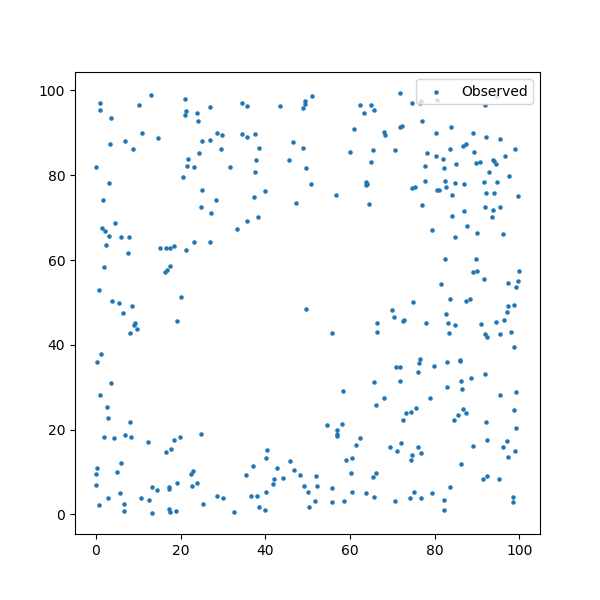

In [2]:
OC = np.loadtxt("observed_catalogs/oc.dat")

# z cut
Z_c = [50]

Xo = OC[:,0]
Yo = OC[:,1]
Zo = OC[:,2]

for z in Z_c:
    index = np.where( abs(Zo-z) < 5 )

    fig = plt.figure(figsize=FGsize)
    plt.scatter(Xo[index], Yo[index], s=5, label="Observed")
    plt.legend(loc="upper right")

# Nothing Here

<IPython.core.display.Javascript object>


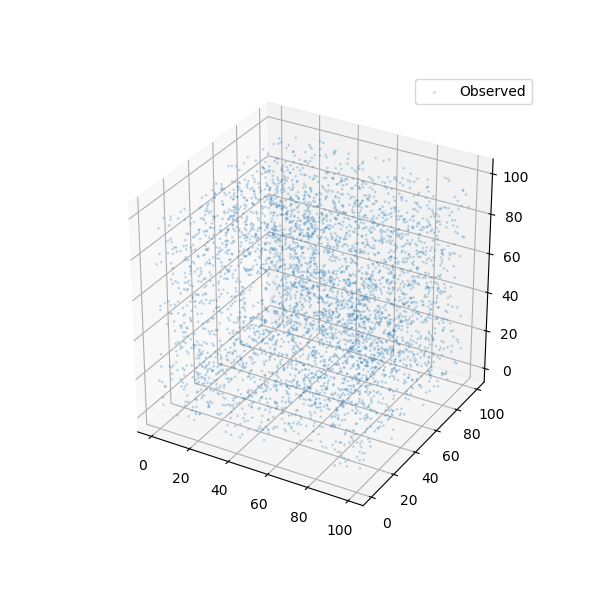

In [3]:
fig = plt.figure(figsize=FGsize)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xo,Yo,Zo, s=1, alpha=0.2, label="Observed")

ax.set_aspect(1)
ax.legend(loc=1)

<IPython.core.display.Javascript object>


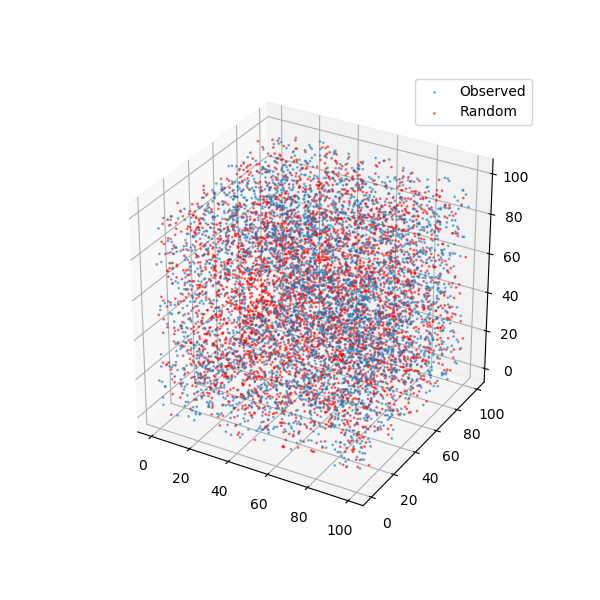

In [4]:
def gen_random():
    L = 100
    x = np.random.rand() * L
    y = np.random.rand() * L
    z = np.random.rand() * L
    
    return [x,y,z]

np.random.seed(0)
RC = []
for i in range(OC.shape[0]):
    RC.append(gen_random())   
RC = np.array(RC)
np.savetxt( "random_catalogs/1.cat", RC)

Xr = RC[:,0]
Yr = RC[:,1]
Zr = RC[:,2]



fig = plt.figure(figsize=FGsize)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xo,Yo,Zo, s=1, alpha=0.5, label="Observed")
ax.scatter(Xr,Yr,Zr, s=1, c="r", alpha=0.5, label="Random")

ax.set_aspect(1)
ax.legend(loc=0)

<IPython.core.display.Javascript object>


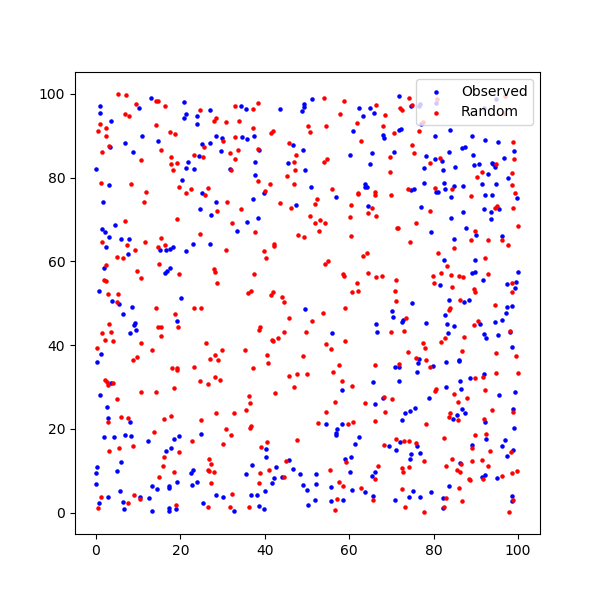

(8366, 3)
(4183, 3)


In [5]:
def SCATTER_3d( cat1 , *args):    
    X1 = cat1[:,0]
    Y1 = cat1[:,1]
    Z1 = cat1[:,2]

    if(len(args)>=1):
        cat2 = args[0]
        X2 = cat2[:,0]
        Y2 = cat2[:,1]
        Z2 = cat2[:,2]

    if(len(args)>=2):
        cat3 = args[1]
        X3 = cat3[:,0]
        Y3 = cat3[:,1]
        Z3 = cat3[:,2]     
        
    

    fig = plt.figure(figsize=FGsize)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect(1)
    
    ax.scatter(X1, Y1, Z1, s=5, c="b", alpha=0.2)
    if(len(args)>=1):
        ax.scatter(X2, Y2, Z2, s=5, c="r", alpha=0.2)
    if(len(args)>=2):
        ax.scatter(X3, Y3, Z3, s=15, c="b", alpha=1)
        
def PLOT_SLICE_OF_CAT( cat1 , *args):
    
    slice_tickness = 10

    Z_c = [50]
    
    X1 = cat1[:,0]
    Y1 = cat1[:,1]
    Z1 = cat1[:,2]

    if(len(args)>=1):
        cat2 = args[0]
        X2 = cat2[:,0]
        Y2 = cat2[:,1]
        Z2 = cat2[:,2]

    if(len(args)>=2):
        cat3 = args[1]
        X3 = cat3[:,0]
        Y3 = cat3[:,1]
        Z3 = cat3[:,2]        

    for z in Z_c:
        fig = plt.figure(figsize=FGsize)
        
        index_1 = np.where( abs(Z1-z) < slice_tickness )
        plt.scatter(X1[index_1],  Y1[index_1], s=1, c="b")
        
        if(len(args)>=1):        
            index_2 = np.where( abs(Z2-z) < slice_tickness )
            plt.scatter(X2[index_2],  Y2[index_2], s=1, c="r")        

        if(len(args)>=2):        
            index_3 = np.where( abs(Z3-z) < slice_tickness )
            plt.scatter(X3[index_3],  Y3[index_3], s=15, c="g")        

            

slice_tickness = 5
Z_c = [50]


for z in Z_c:
    fig = plt.figure(figsize=FGsize)
    index_1 = np.where( abs(Zo-z) < slice_tickness)
    index_2 = np.where( abs(Zr-z) < slice_tickness)
    
    plt.scatter( Xo[index_1], Yo[index_1], s = 5, c="blue", label="Observed")
    plt.scatter( Xr[index_2], Yr[index_2], s = 5, c="red", label="Random")
    
    
    plt.legend(loc=1)


FC = np.vstack([RC,OC])

print(FC.shape)
print(RC.shape)
np.savetxt("full_catalogs/1.cat", FC)            

    subp.run("LSS_BSK_calc -input  " + fc_path + fc_filename +
             " -output " + str(FILENUM) +
             " -beta " + str(BETA) +
             " -printinfo True -numNNB 300"
             , shell=True, check=True)



In [6]:
OC_FILE_IN = "oc.dat"
FILENUM = "1"
BETA = 1.0
nrand = 1.0

prog = "progress.txt"


### Paths
RC_path = "random_catalogs/"
FC_path = "full_catalogs/"
OC_path = "observed_catalogs/"
BS_path = "xdl_beta_skeleton/"
ML_path = "masterlists/"
FG_path = "figures/"
VE_path = "volume_and_excentricity/"

OC_filename = OC_FILE_IN
FC_filename = "{}.cat".format(FILENUM)
RC_filename = "{}.cat".format(FILENUM)
BS_filename = "{}.BSKIndex".format(FILENUM)
ML_filename = "{}.mls".format(FILENUM)
FG_filename = "{}".format(FILENUM)
VE_filename = "{}.vae".format(FILENUM)

beta = BETA
n_rand = nrand

In [7]:
#################################################################
#                                                               #
#                    Void Finder Main Loop                      #
#                                                               #
#################################################################
beta = BETA
n_rand = nrand
toc = timeit.default_timer()
subp.run( "echo  Finding voids in {} >> {}".format(OC_FILE_IN, prog), shell=True, check=True)

InitialMessage  = "\n\n\n #########################################################"
InitialMessage += "\n\n Running with:\n"
InitialMessage += "\n\t n_rand = {}".format(n_rand)
InitialMessage += "\n\t beta   = {}".format(beta)

print(InitialMessage)
print(" Using this files:\n\t{}\n\t{}\n\t{}\n\t{}".format(RC_filename,FC_filename,BS_filename,OC_filename,ML_filename))

RC    = np.loadtxt(RC_path + RC_filename)
OC    = np.loadtxt(OC_path + OC_filename)
FC    = np.loadtxt(FC_path + FC_filename)
BS    = np.loadtxt(BS_path + BS_filename)

N_rnd = RC.shape[0]
N_obs = OC.shape[0]

print(" Reading Full Catalogs and Beta-Skeleton from:\n\t{}\n\t{}".format(FC_filename,BS_filename))
print(" Previous BetaSkeleton Shape before Stacking: ", BS.shape)

### Transforms Xiao-Dong Li's Beta Skeleton Index to long list

a = BS[:,0].astype(int)
a = list(a)
b = BS[:,1].astype(int)
b = list(b)

c = []
c.extend(a)
c.extend(b)
d = []
d.extend(b)
d.extend(a)

c = np.array(c, dtype=int)
d = np.array(d, dtype=int)

fcBSkel = np.vstack((c,d)).T





 #########################################################

 Running with:

	 n_rand = 1.0
	 beta   = 1.0
 Using this files:
	1.cat
	1.cat
	1.BSKIndex
	oc.dat
 Reading Full Catalogs and Beta-Skeleton from:
	1.cat
	1.BSKIndex
 Previous BetaSkeleton Shape before Stacking:  (31104, 2)


In [8]:
print("Next BetaSkeleton Shape after Stacking: ", fcBSkel.shape)

### Search for the first N_rnd points in the FC.

# Find RANDOM POINTS in the fcBeta-Skeleton Graph.
first_filter_index = np.where(fcBSkel[:,0] < N_rnd)  
    
# Store the partial Beta-Skeleton Graph of Random Points and
# its connections. They may have connections with Obs. points
# and other Random points.
first_filter_BSkel = np.array(fcBSkel[first_filter_index]).astype(int)

# Find the Random Points connected only to Random Points.

# To do this, first we find those points whom are connected to 
# observational points.
second_filter_index = np.where( first_filter_BSkel[:,1] >= N_rnd )[0]
    
# They are going to be dropped.
particle_ID_to_drop = first_filter_BSkel[second_filter_index,0]
particle_ID_to_drop.sort()
# A set of the Random Points connected to Observational points
# is created, there are not repeated items.
droplist = set(particle_ID_to_drop)

print( "First filter shape:", first_filter_BSkel.shape, 
       "\nHow many of them have direct connections"+
       " with galaxies (i.e. droplist length)", 
       len(droplist),
       "\nThen, must survive", len(set(first_filter_BSkel[:,0])) -len(droplist), 
       "trueVoidPoints")

# We have the Random points set:
# Maybe not all Random Particles are connected to the Skeleton. (large Beta)
# Because of this, we doesn't take into account something like
# Points_in_Skeleton = range(0,N_rnd).


print('Checking Random Points in the Beta Skeleton')
Points_in_Skeleton = set(first_filter_BSkel[:,0])
print('Random Points in Beta Skeleton Checked') 

# and the droplist. The complement(difference) is the
# pure void points set.

print('')
trueVoidPointsIndex = Points_in_Skeleton.difference(droplist)
# This set is converted to list, it will be used as an index to find 
# True Voids.
trueVoidPointsIndex = list(trueVoidPointsIndex)
trueVoidPointsIndex.sort()

# This is the first definition of TRUE VOID POINTS.
# Catalog of particles in voids
void_cat = FC[trueVoidPointsIndex]

### True Voids have been foud. #########################################
########################################################################



Next BetaSkeleton Shape after Stacking:  (62208, 2)
First filter shape: (31363, 2) 
How many of them have direct connections with galaxies (i.e. droplist length) 3811 
Then, must survive 372 trueVoidPoints
Checking Random Points in the Beta Skeleton
Random Points in Beta Skeleton Checked



In [9]:
### Looking for the connections of the TrueVoidPoints
    
index=[]
for k in trueVoidPointsIndex:
    index.extend( list( np.where( (fcBSkel[:,0] == k) &
                                 (fcBSkel[:,1] > k))[0].astype(int) ) )
    
    index = list(set(index ) )
    index.sort()
# DEBUG
#print(index)

# Beta-Skeleton of TrueVoidPoints (includes Frontier Points)
VoidsBS = np.array(fcBSkel[index]).astype(int)
trueVoidPointsIndex.sort()
    
print(" Void BetaSkeleton Shape: ", VoidsBS.shape)
print(" The len of trueVoidPointsIndex", len(trueVoidPointsIndex))

# This is the MasterList of Voids.

# Each TrueVoidPoint_index is checked.
# If doesn't exists, is identified as a new void (a new sublist is created)
# If it exists already, the point and its connections are added to the existing void sublist.
    



 Void BetaSkeleton Shape:  (1387, 2)
 The len of trueVoidPointsIndex 372


In [10]:
VoidsBS.shape

(1387, 2)

In [11]:
MiniList = []

for point in trueVoidPointsIndex:
    
    index = np.where(VoidsBS[:,0] == point)[0]
    aux = VoidsBS[index,1]
    aux.sort()
    #print( point, aux)
    auxList = [point]
    
    if( len(aux)>1):
        auxList.extend(aux)
        MiniList.append(auxList)
    
for i in MiniList:
    print(MiniList.index(i), i)

0 [15, 712, 944, 2163, 3175, 3330]
1 [21, 185, 238, 782, 1043, 1326, 2205, 2345, 2409, 3475]
2 [27, 194, 1273, 1390, 2456, 3052, 4140]
3 [35, 45, 415, 1843, 1986, 2018, 2137, 2171, 2622, 2672, 3071, 3843]
4 [45, 62, 2171, 2235, 2622, 2672, 3760, 4122]
5 [62, 184, 1570, 1994, 2261, 2830, 3003, 3668, 3737, 3905]
6 [65, 459, 1517, 2240, 2878, 2940, 3385, 3587]
7 [71, 227, 819, 1551, 2318, 4042, 4163]
8 [78, 370, 1510, 2687, 2783]
9 [81, 877, 1232, 2430, 2576, 2731, 2771, 3674, 3823, 3976]
10 [114, 809, 2085, 2424, 2910, 3797, 4020, 4099, 4103, 4140]
11 [146, 282, 696, 965, 1705, 3086, 3585, 4128]
12 [150, 1974, 2154, 2278, 2361, 2393]
13 [155, 370, 371, 477, 1793, 2628, 2641, 2739, 2783, 2827, 3586]
14 [165, 221, 382, 1004, 1427, 1510, 1900, 2687, 2739, 3108]
15 [166, 610, 922, 2660, 2739, 3893]
16 [171, 1144, 1698, 2029, 2101, 2436, 3593, 3683, 3737, 4122]
17 [184, 828, 1035, 1556, 1740, 2447, 2615, 3003, 3014, 3905]
18 [194, 1390, 2539, 3052, 4140]
19 [203, 243, 610, 1004, 1427, 1789, 2

In [12]:
mergers2 = []

for void in MiniList:
    
    ID = MiniList.index(void)
    
    mergers = []
    for search in void:
        aux = list(search in sublist for sublist in MiniList)        
        aux2 = [i for i, x in enumerate(aux) if x] 
        aux2 = aux2[1:]
        
        aux3 = []
        for element in aux2 :
            if (element > ID):
                aux3.append(element)
        
        if (len(aux3) > 0):
            #print(ID, aux3)
            mergers.extend(aux3)
            
    mergers = list(set(mergers))
    mergers.sort()
    print(ID,mergers)
    
    mergers2.append([ID, mergers])
    #print(any(search in sublist for sublist in MasterList))

0 []
1 [35, 37, 73, 162, 194]
2 [10, 18, 24, 84, 116, 123, 160, 172]
3 [4, 22, 43, 111, 112, 127, 133, 134, 141, 147, 165, 166, 176, 182, 192, 201, 205, 214, 215, 242, 268]
4 [5, 16, 43, 103, 133, 134, 165, 176, 198, 205, 215, 260, 271, 272]
5 [16, 17, 53, 99, 127, 161, 177, 198, 215, 272]
6 [36, 74, 78, 102, 155, 196, 223, 224, 256]
7 [24, 77, 197, 231]
8 [13, 14, 20, 39, 80, 119, 135, 159, 233]
9 [85, 110, 122, 156, 202, 211]
10 [18, 24, 76, 79, 115, 116, 123, 132, 160, 189, 203, 236]
11 [28, 67, 89, 150, 263, 269]
12 []
13 [14, 15, 23, 39, 40, 41, 48, 49, 75, 86, 94, 135, 159, 174, 187, 216, 228, 233]
14 [15, 19, 20, 26, 39, 41, 58, 61, 80, 86, 90, 94, 119, 129, 135, 159, 228]
15 [19, 39, 41, 61, 91, 94, 159, 186, 218, 228]
16 [103, 134, 144, 146, 149, 177, 185, 198, 205, 215, 227, 237, 240, 260, 268, 271, 272]
17 [42, 53, 66, 99, 127, 161, 177]
18 [84, 123, 172]
19 [20, 25, 26, 41, 51, 54, 58, 61, 86, 87, 90, 94, 118, 129, 138, 154, 155, 158, 168, 199, 212, 257]
20 [35, 41, 51, 61,

In [13]:
MiniLen = len(MiniList)

In [14]:
iscounted = np.zeros([len(mergers2)], dtype=int)

In [15]:
iscounted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
def neighbours(ID):
    friends = mergers2[ID][1]
    
    neigh = []
    
    if iscounted[ID] >0:
        return neigh

    if len(friends)==0 :        
        iscounted[ID] =+ 1
        return neigh
    
    else:
        neigh = [ID]        
        for friend in friends:
            neigh.extend(neighbours(friend))
            neigh = list(set(neigh))
            neigh.sort()
        iscounted[ID] =+ 1
        return neigh
    
    

In [17]:
toMerge = []

for i in range(len(mergers2)):
    if iscounted[i] == 0 :
        neig =  neighbours(i)
        
        toMerge.append([i,neig])
        print(i,neig)
        print(iscounted, "\n")

0 []
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

1 [1, 35, 37, 48, 49, 55, 73, 80, 81, 88, 92, 107, 114, 118, 119, 130, 135, 138, 145, 155, 159, 162, 168, 174, 178, 181, 186, 187, 196, 206, 210, 216, 218, 220, 221, 223, 232, 247, 254, 257]
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 0

In [18]:
iscounted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
len(toMerge)

38

In [20]:
VOIDS = []
for i in range(len(toMerge)):
    
    if len(toMerge[i][1])==0 :
        #print(i, MiniList[i])
        VOIDS.append(MiniList[i])
    
    else:
        #print(toMerge[i][1])
        aux = []
        for l in toMerge[i][1]:
            aux.extend( MiniList[l])
        aux = list( set(aux))
        aux.sort()
        VOIDS.append(aux)

In [34]:
for void in VOIDS:
    print(VOIDS.index(void), len(void))

0 6
1 120
2 80
3 130
4 140
5 7
6 91
7 29
8 33
9 10
10 6
11 35
12 9
13 26
14 3
15 6
16 8
17 6
18 6
19 13
20 9
21 9
22 8
23 4
24 8
25 11
26 4
27 5
28 7
29 6
12 9
31 4
32 9
33 8
14 3
35 10
36 12
37 9


In [22]:
MasterList = VOIDS

#################################################################
#                                                               #
#                Store the Void Masterlist                      #
#                                                               #
#################################################################

X = RC[:,0]
Y = RC[:,1]
Z = RC[:,2]

with open(ML_path + ML_filename, 'w') as file:

    for k in range(len(MasterList)):   
        for particle in MasterList[k]:
            line  = str( k *1.0) + " " 
            line += str(X[particle]) + " " 
            line += str(Y[particle]) + " " 
            line += str(Z[particle] ) + "\n"
            
            file.write(line)

    tic = timeit.default_timer()

FinalMessage = "\n\n We have fihished the process of "
FinalMessage += "\n Finding Voids in the file with "
FinalMessage += "\n beta: \t{}".format(beta)
FinalMessage += "\n n_rnd:\t{}".format(n_rand)
FinalMessage += "\n\n\tOutput written in \n" + ML_path + ML_filename
FinalMessage += "\n\n\t Time elapsed:{} seconds".format(tic - toc)
FinalMessage += "\n ###############################################"

print(FinalMessage)

subp.run( "echo Filenumber {}, beta {}, n_rand {}, voids found in {} seconds. >> {}".format(FILENUM, beta, n_rand, tic-toc, prog), shell=True, check=True)




 We have fihished the process of 
 Finding Voids in the file with 
 beta: 	1.0
 n_rnd:	1.0

	Output written in 
masterlists/1.mls

	 Time elapsed:142.62858323499677 seconds
 ###############################################


CompletedProcess(args='echo Filenumber 1, beta 1.0, n_rand 1.0, voids found in 142.62858323499677 seconds. >> progress.txt', returncode=0)

In [23]:
Xv = void_cat[:,0]
Yv = void_cat[:,1]
Zv = void_cat[:,2]

<IPython.core.display.Javascript object>


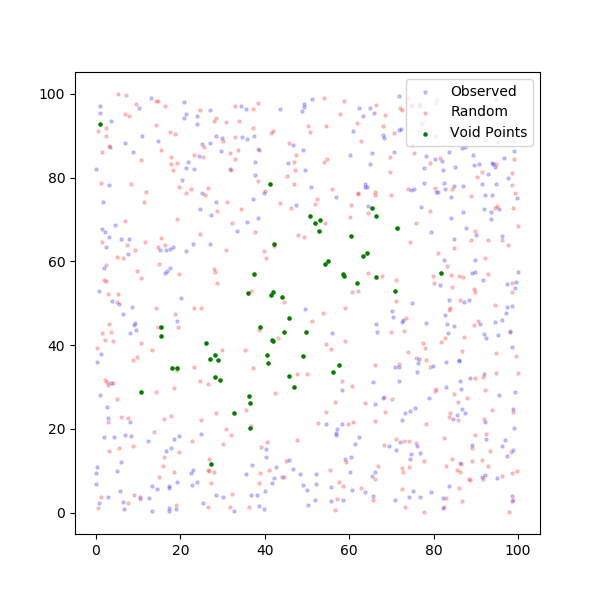

In [24]:

slice_tickness = 5
Z_c = [50]


for z in Z_c:
    fig = plt.figure(figsize=FGsize)
    index_1 = np.where( abs(Zo-z) < slice_tickness)
    index_2 = np.where( abs(Zr-z) < slice_tickness)
    index_3 = np.where( abs(Zv-z) < slice_tickness)
    
    plt.scatter( Xo[index_1], Yo[index_1], s = 5, c="blue", label="Observed", alpha=0.2)
    plt.scatter( Xr[index_2], Yr[index_2], s = 5, c="red", label="Random", alpha=0.2)

    plt.scatter( Xv[index_3], Yv[index_3], s = 5, c="green", label="Void Points")

    
    plt.legend(loc=1)

<IPython.core.display.Javascript object>


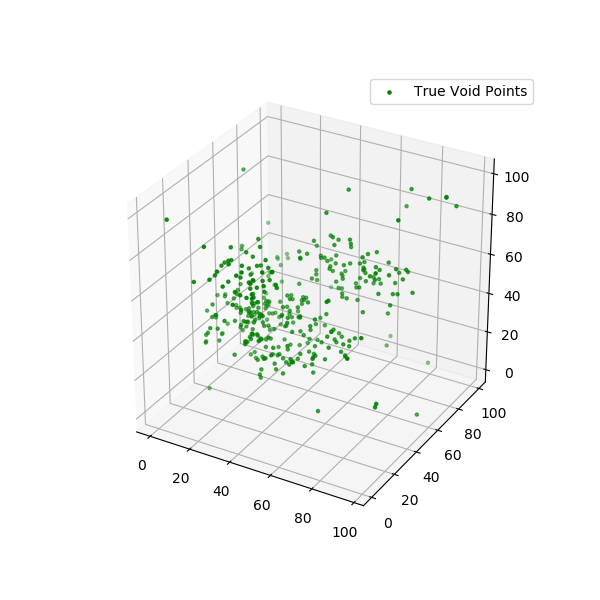

In [24]:
fig = plt.figure(figsize=FGsize)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xv, Yv, Zv, c="green", s=5, label="True Void Points")
ax.legend(loc=1)

In [25]:
index = []
for i in range(fcBSkel.shape[0]):
    if fcBSkel[i,0] in trueVoidPointsIndex:
        index.append(i)

<IPython.core.display.Javascript object>


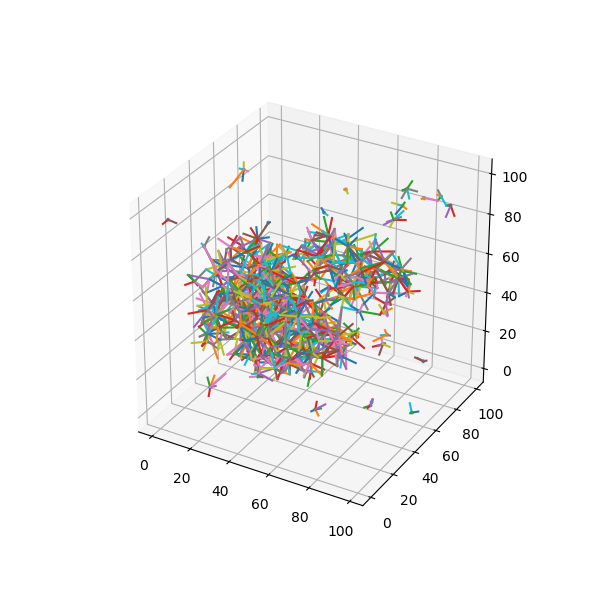

In [26]:

fig = plt.figure(figsize=FGsize)
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect(1)

ax.scatter(Xv,Yv, Zv, s=4, alpha=0.5)

for n in range(len(index)):
    i = fcBSkel[index[n],0]
    j = fcBSkel[index[n],1]
    ax.plot([Xr[i],Xr[j]], [Yr[i],Yr[j]], [Zr[i],Zr[j]])


$\LaTeX$

In [27]:
len(index)

2723

$\beta$

<IPython.core.display.Javascript object>


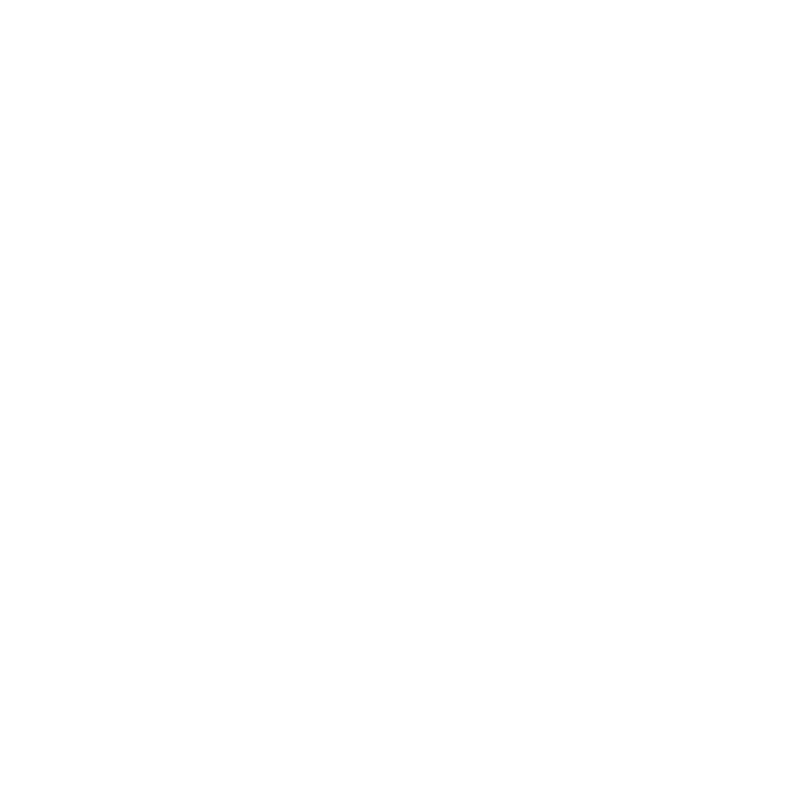

<IPython.core.display.Javascript object>


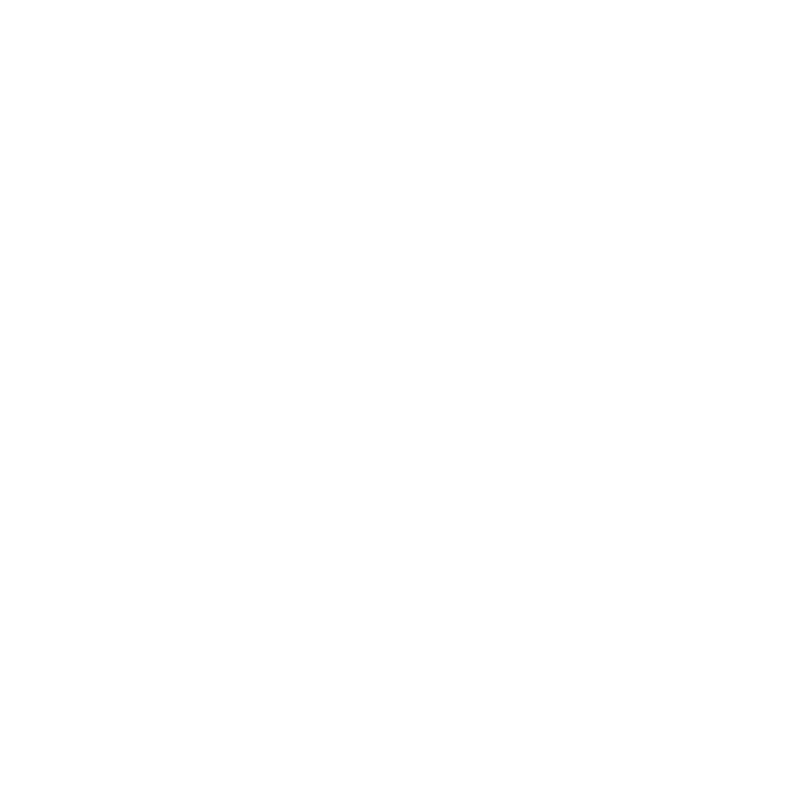

<IPython.core.display.Javascript object>


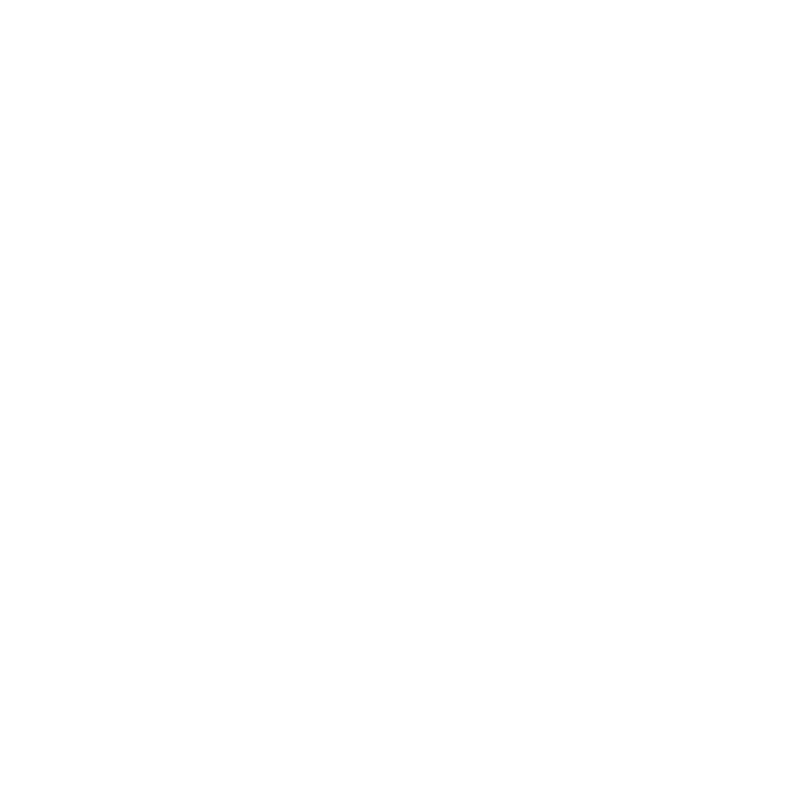

<IPython.core.display.Javascript object>


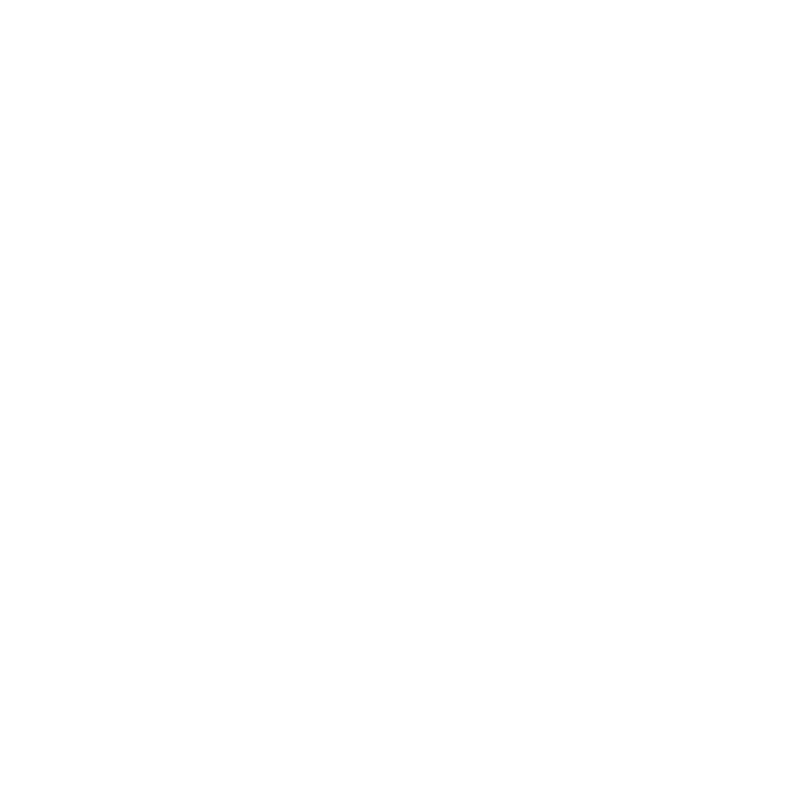

<IPython.core.display.Javascript object>


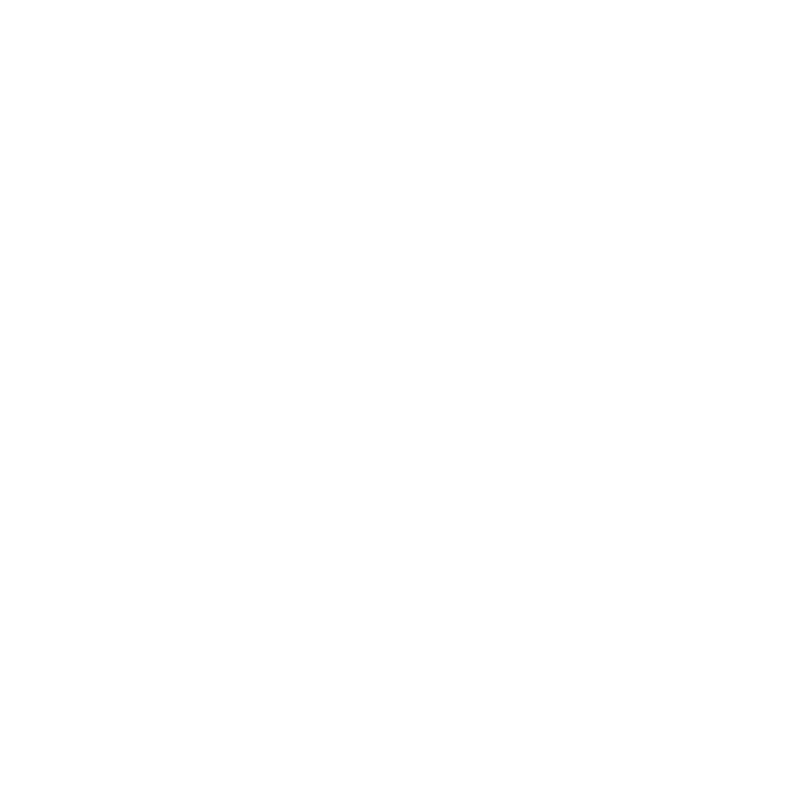

<IPython.core.display.Javascript object>


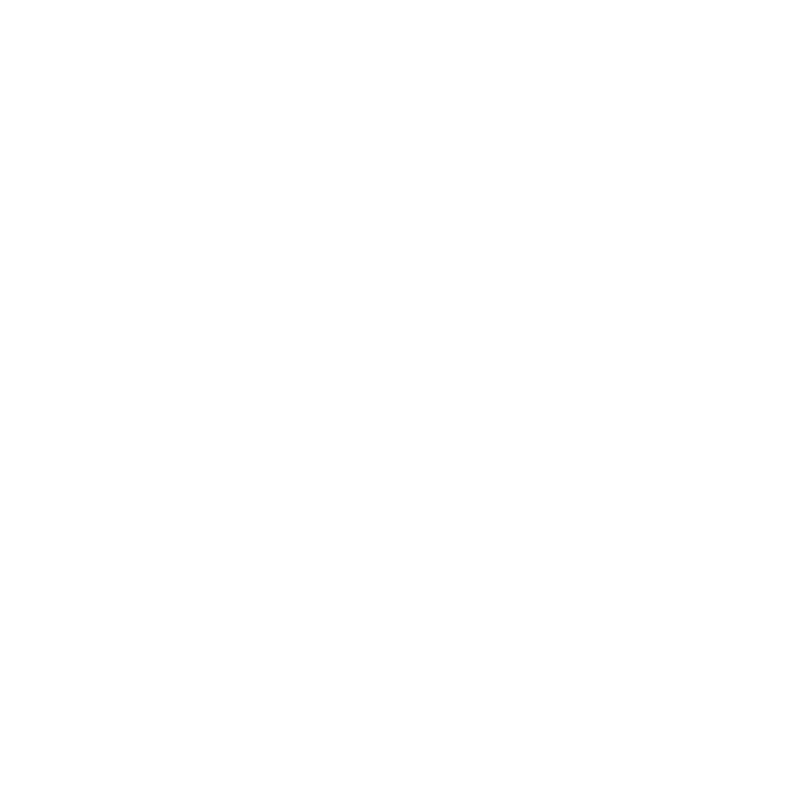

<IPython.core.display.Javascript object>


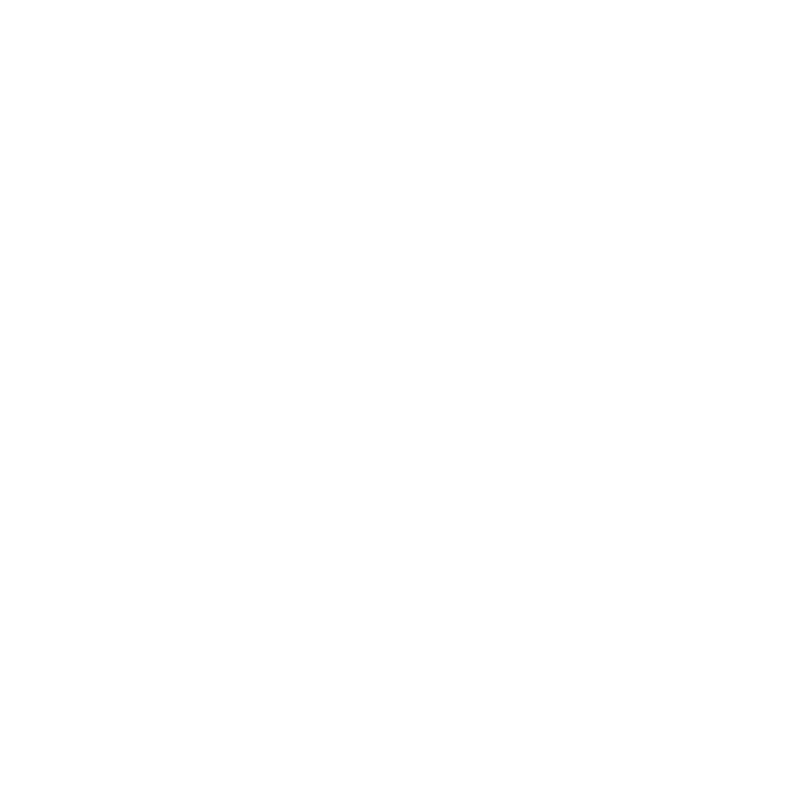

<IPython.core.display.Javascript object>


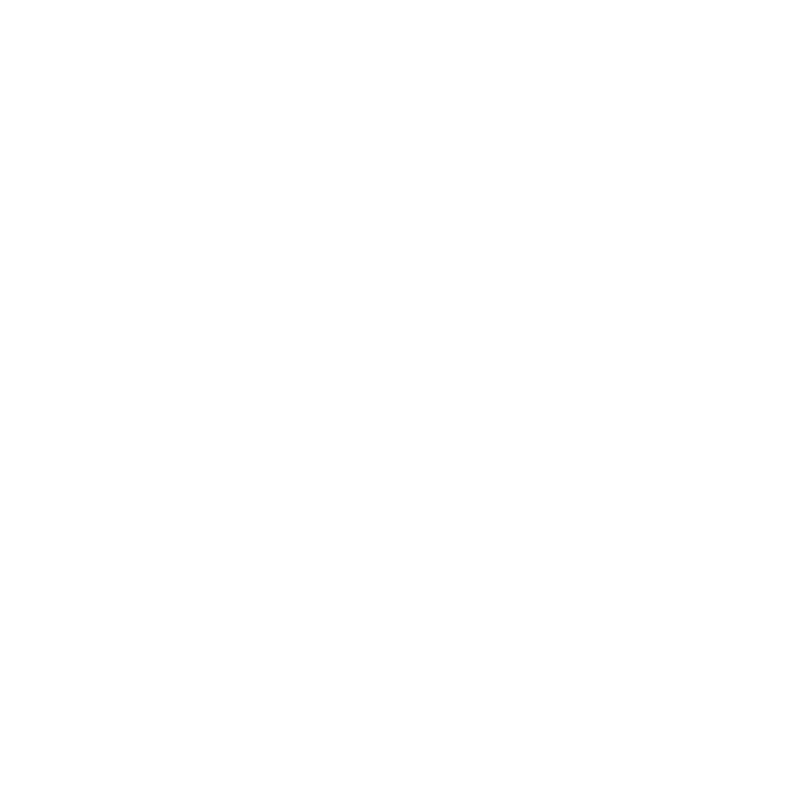

<IPython.core.display.Javascript object>


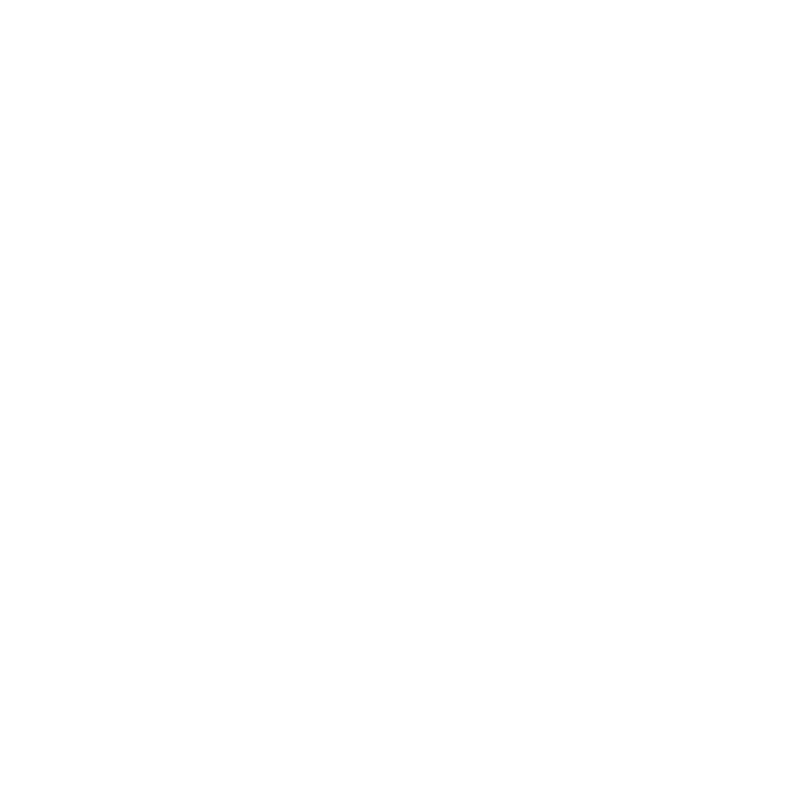

<IPython.core.display.Javascript object>


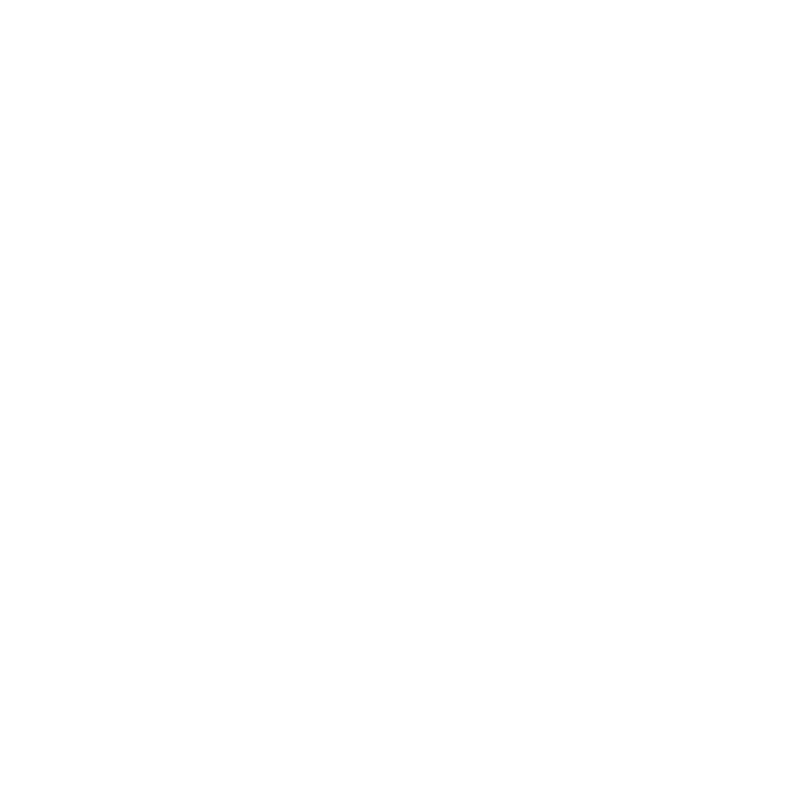

<IPython.core.display.Javascript object>


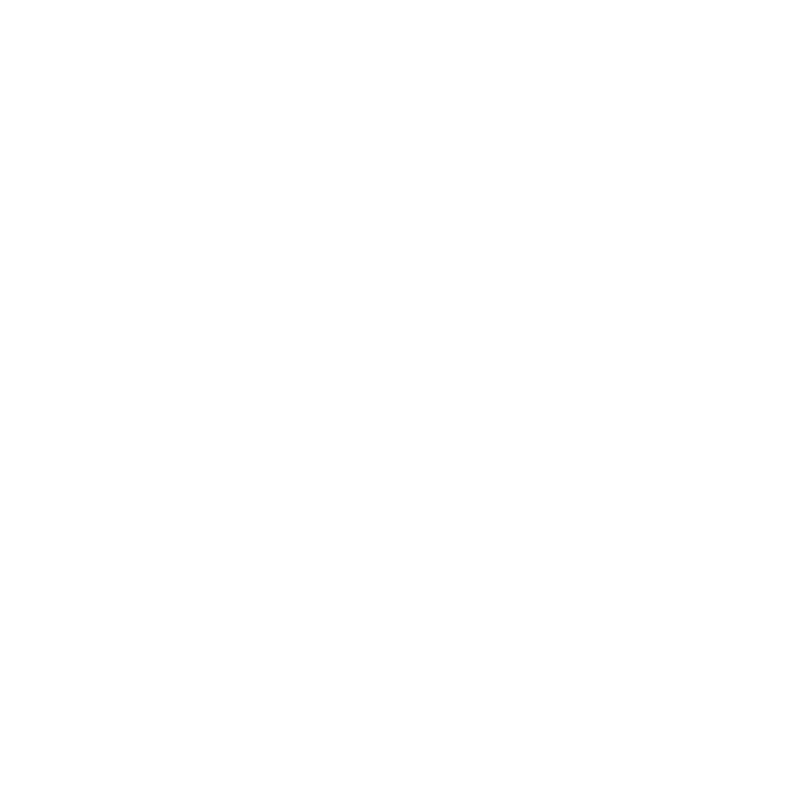

<IPython.core.display.Javascript object>


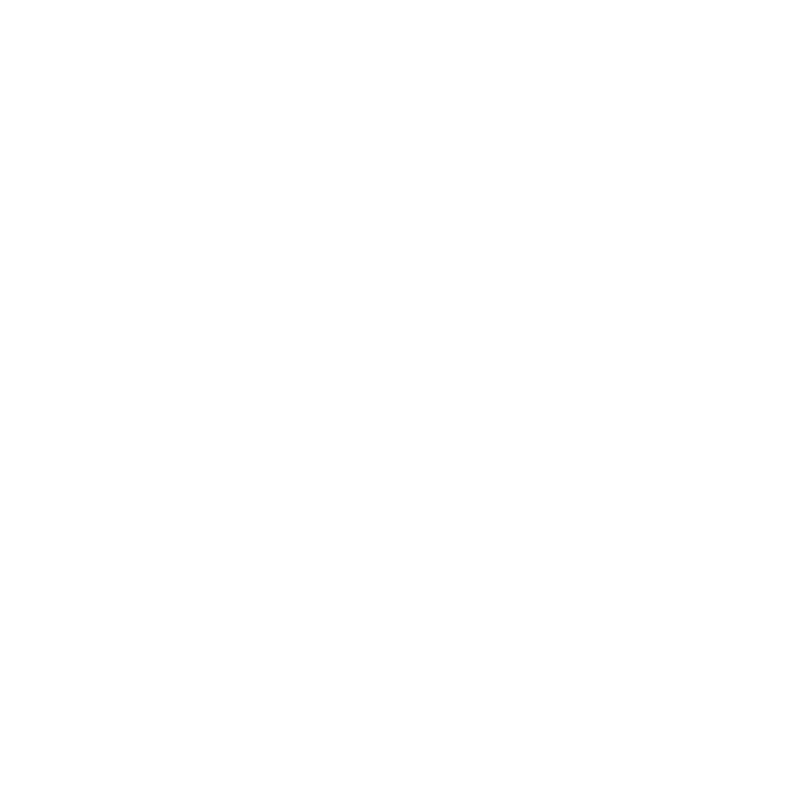

<IPython.core.display.Javascript object>


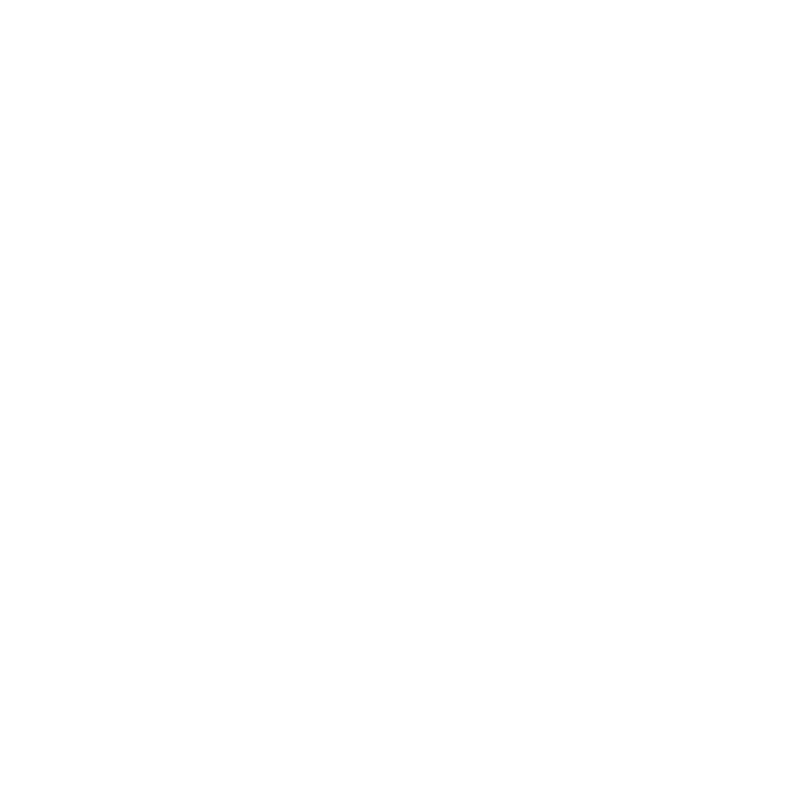

<IPython.core.display.Javascript object>


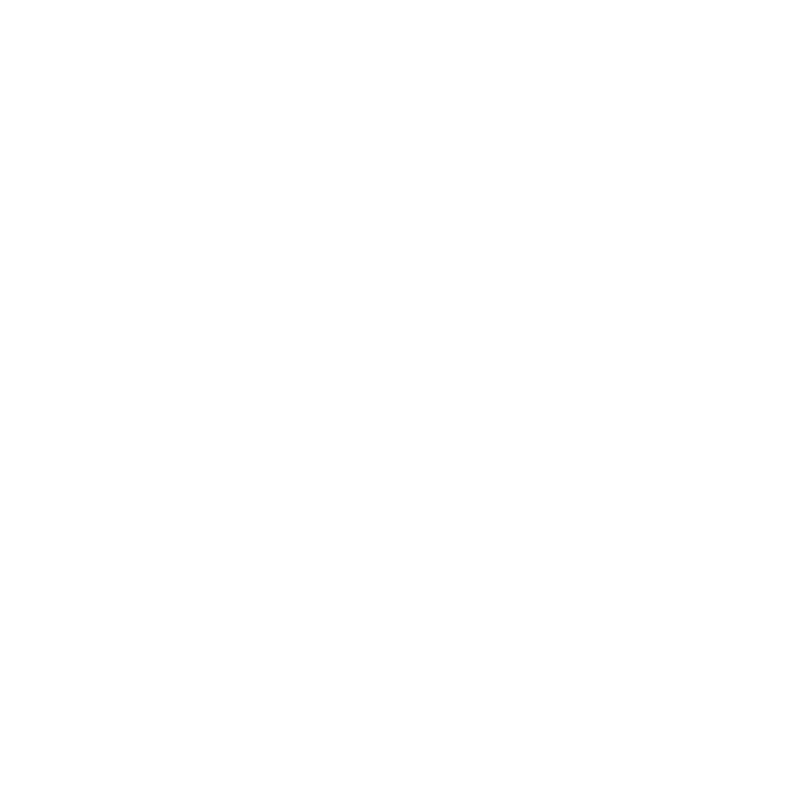

<IPython.core.display.Javascript object>


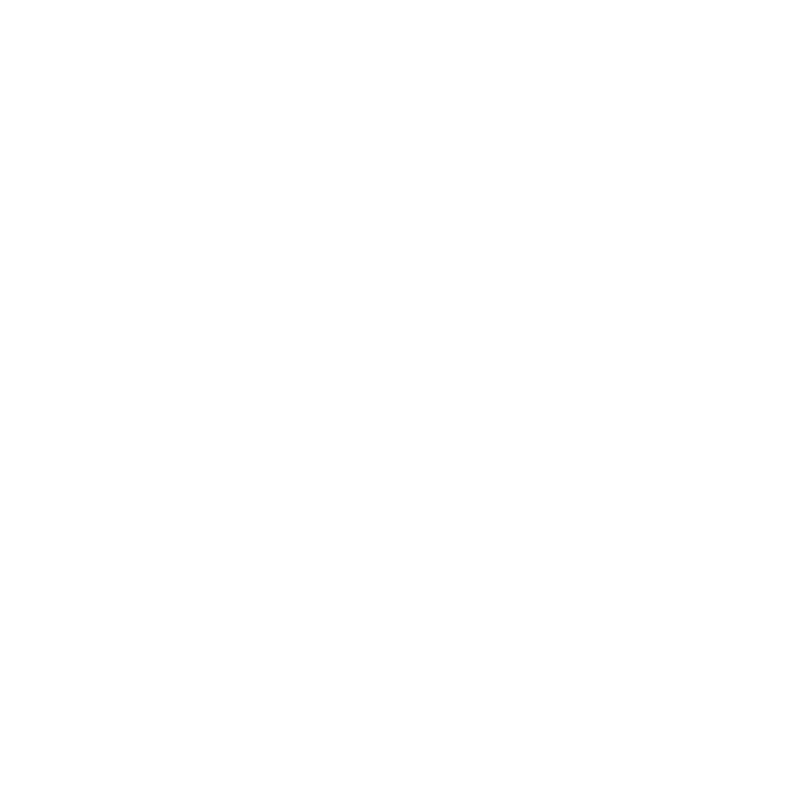

<IPython.core.display.Javascript object>


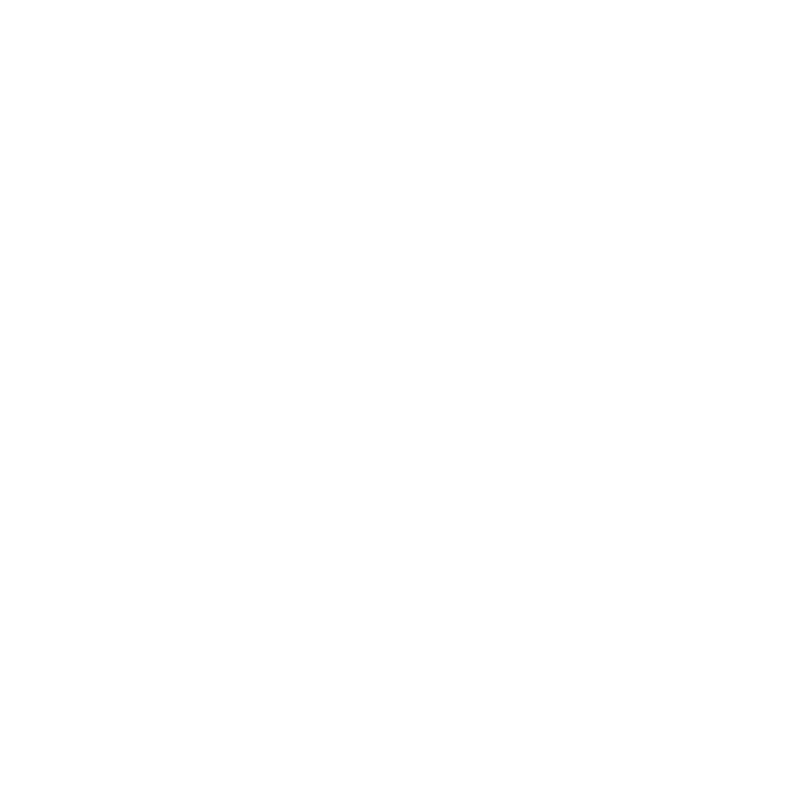

<IPython.core.display.Javascript object>


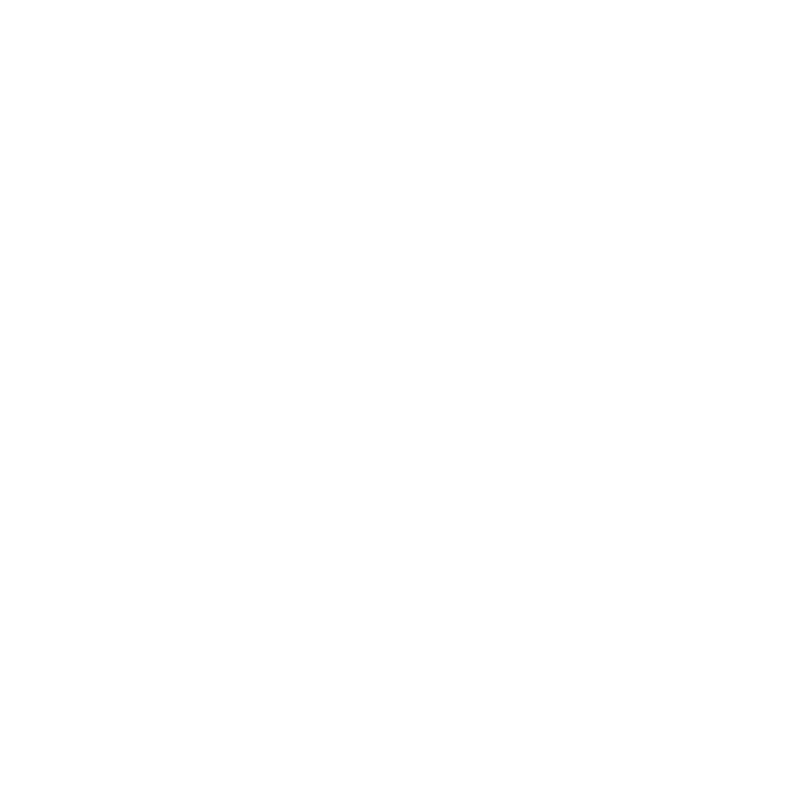

<IPython.core.display.Javascript object>


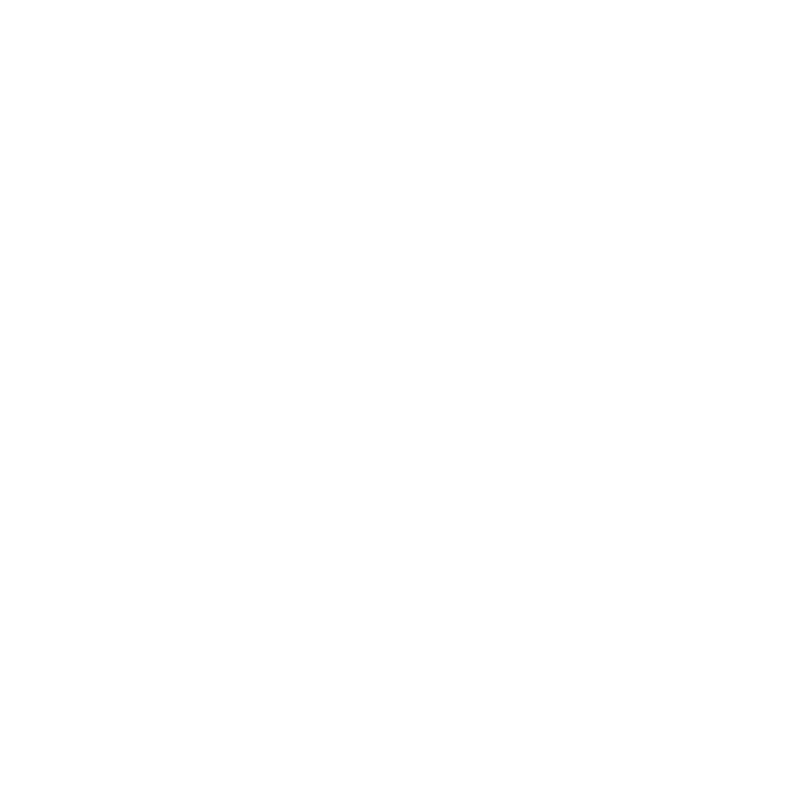

<IPython.core.display.Javascript object>


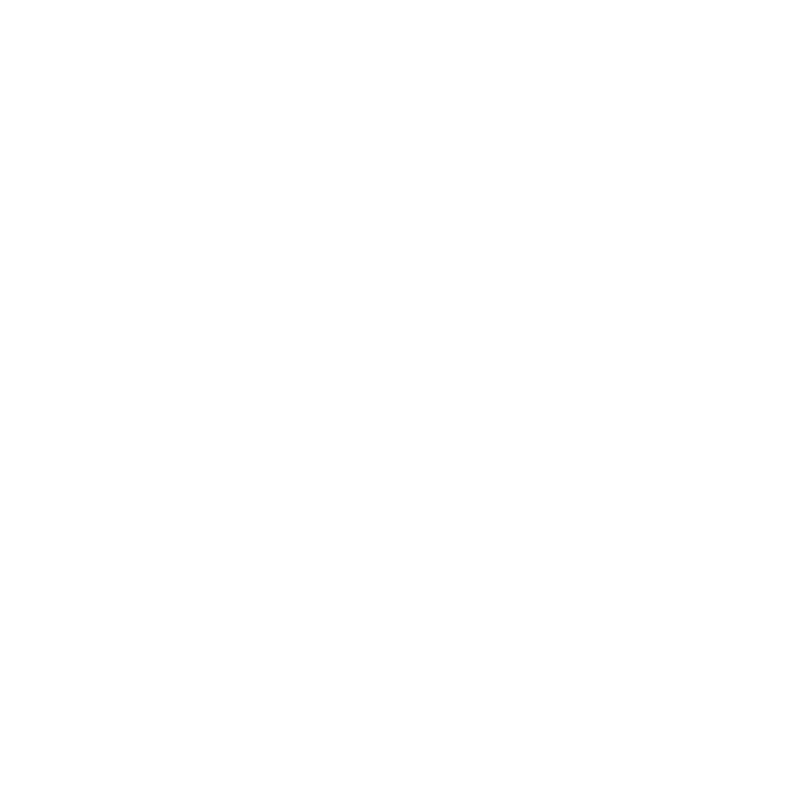

<IPython.core.display.Javascript object>


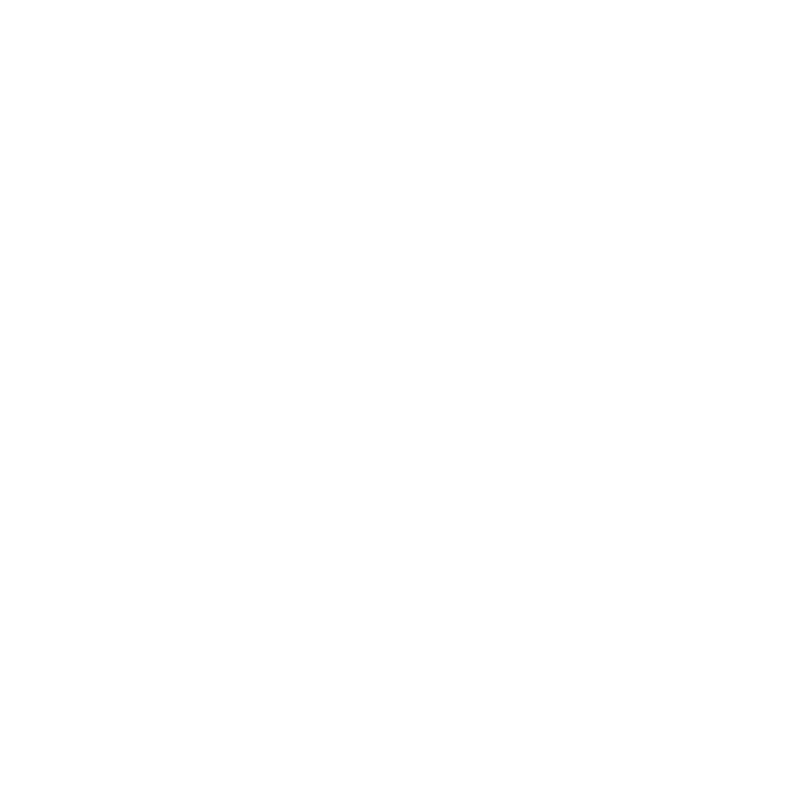

<IPython.core.display.Javascript object>


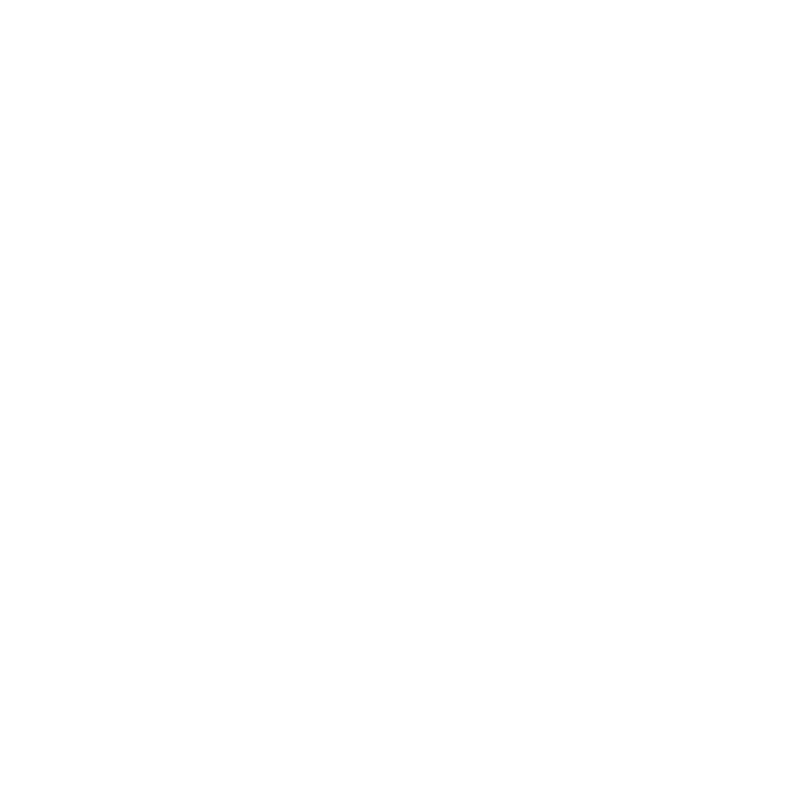

<IPython.core.display.Javascript object>


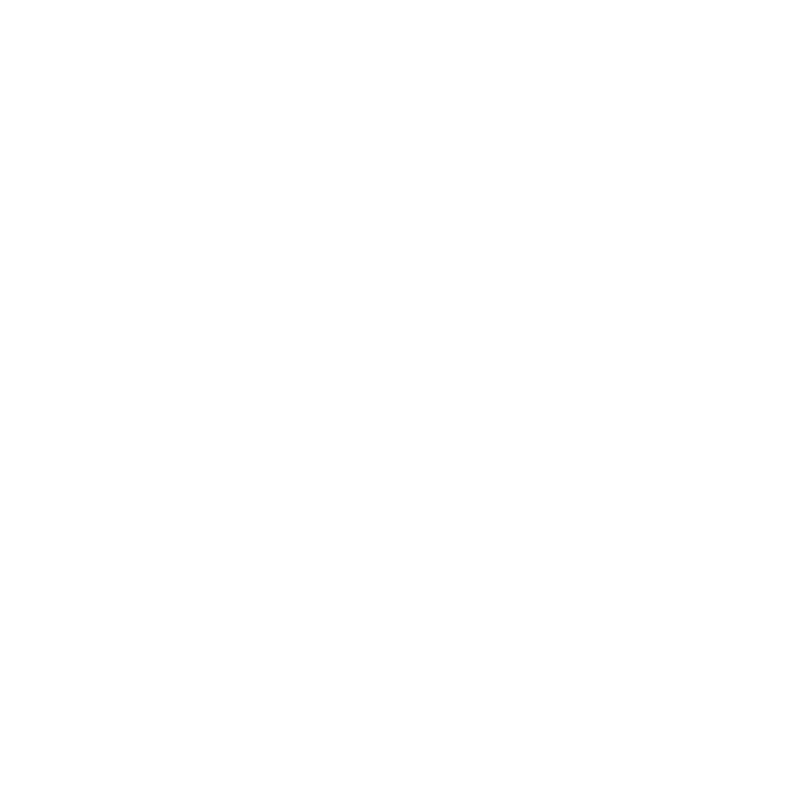

<IPython.core.display.Javascript object>


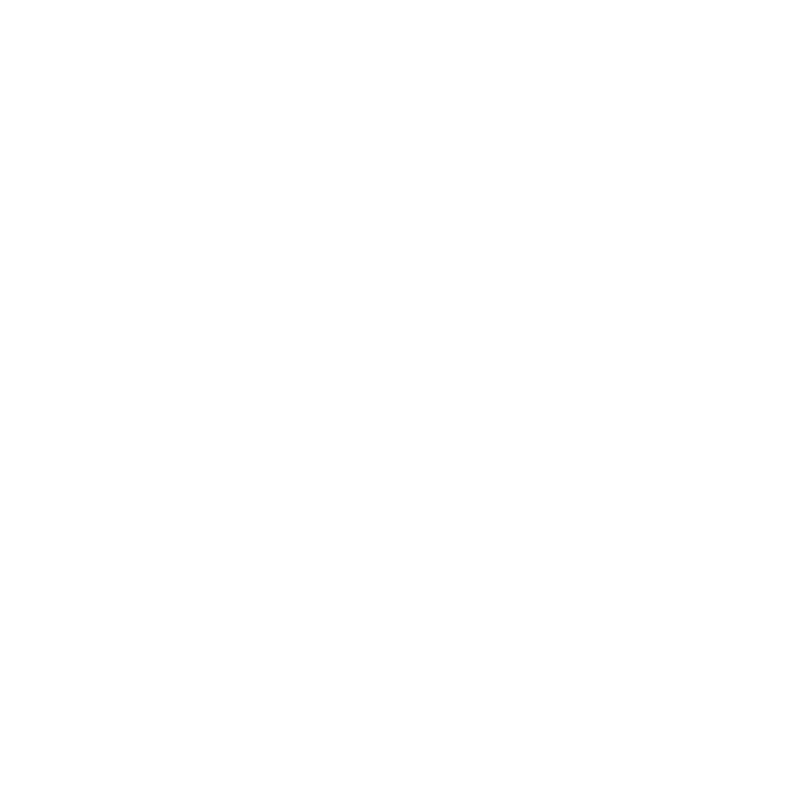

<IPython.core.display.Javascript object>


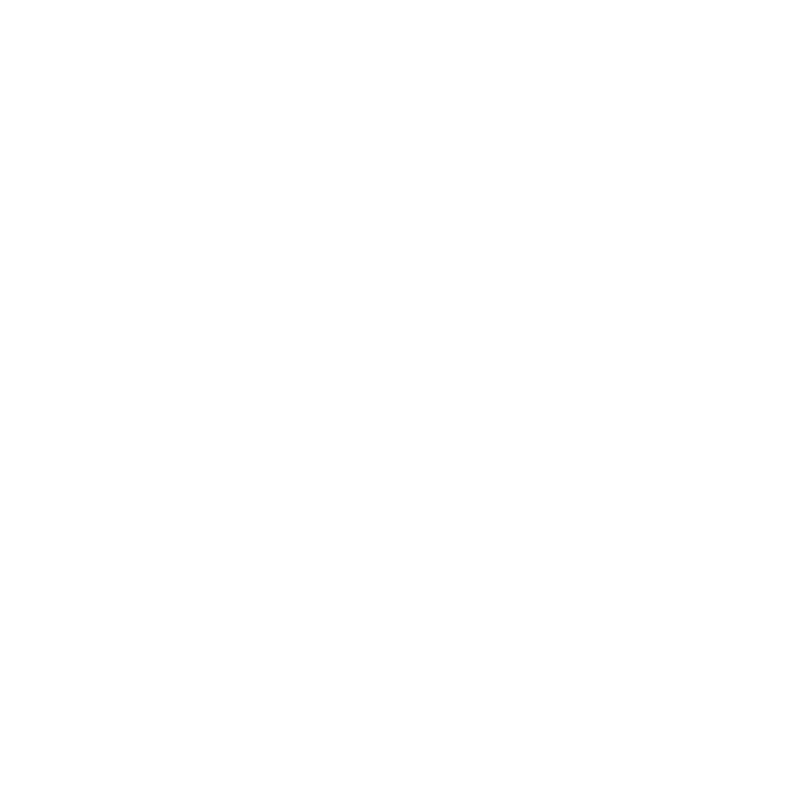

<IPython.core.display.Javascript object>


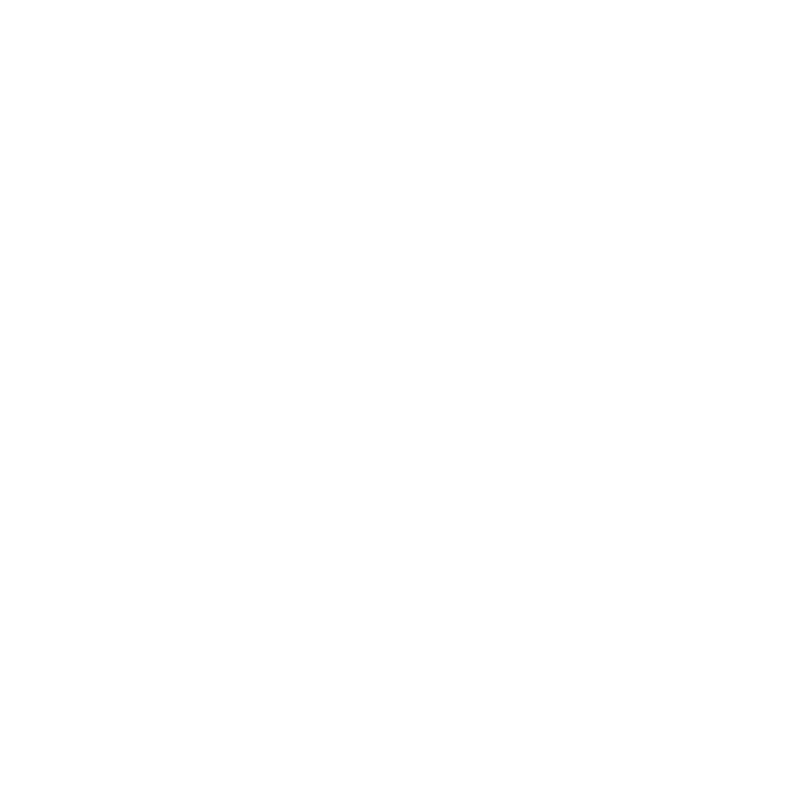

<IPython.core.display.Javascript object>


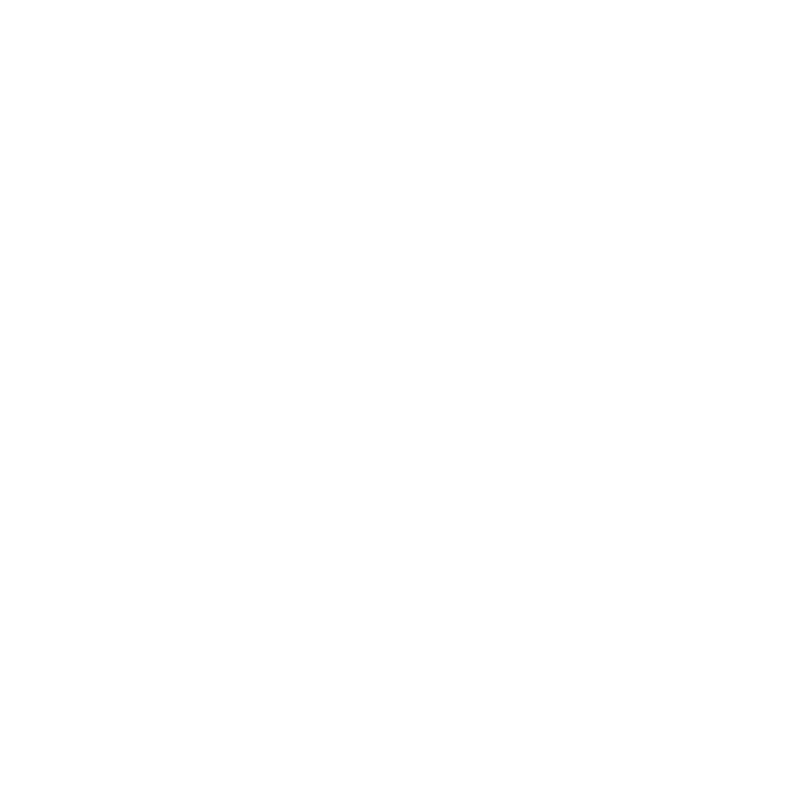

<IPython.core.display.Javascript object>


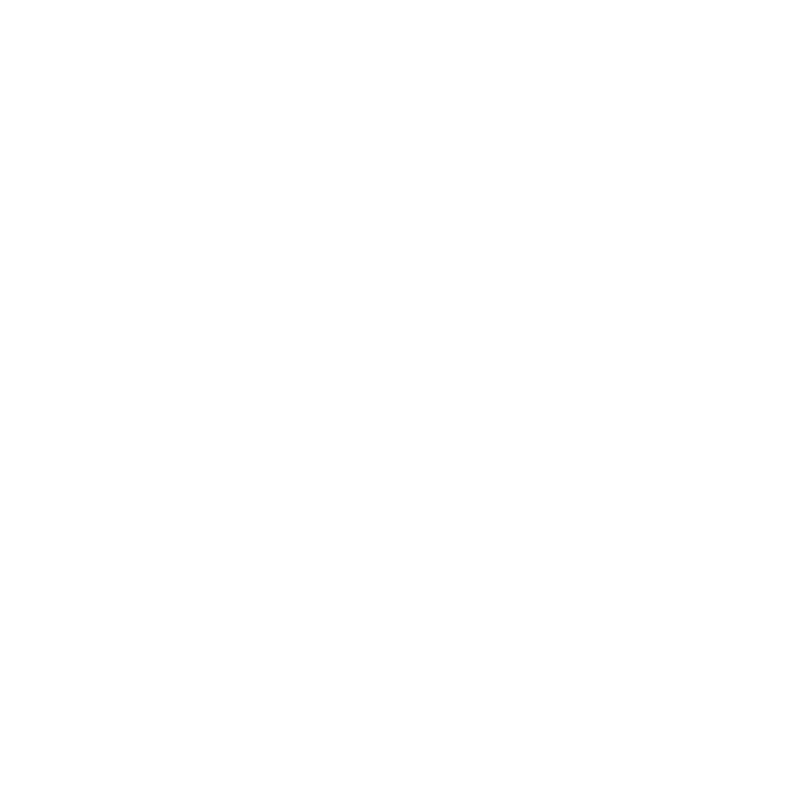

<IPython.core.display.Javascript object>


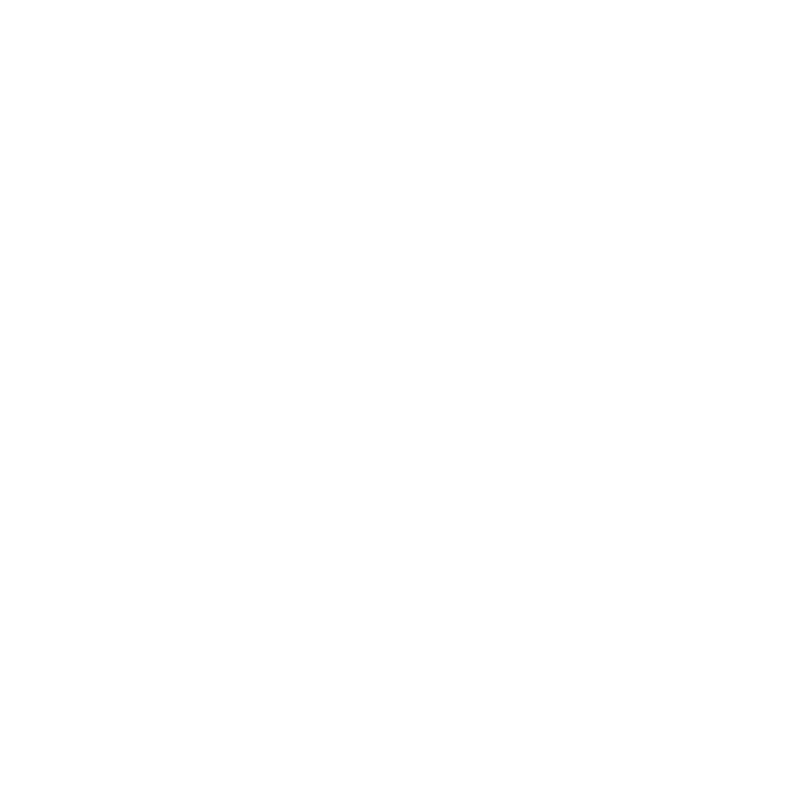

<IPython.core.display.Javascript object>


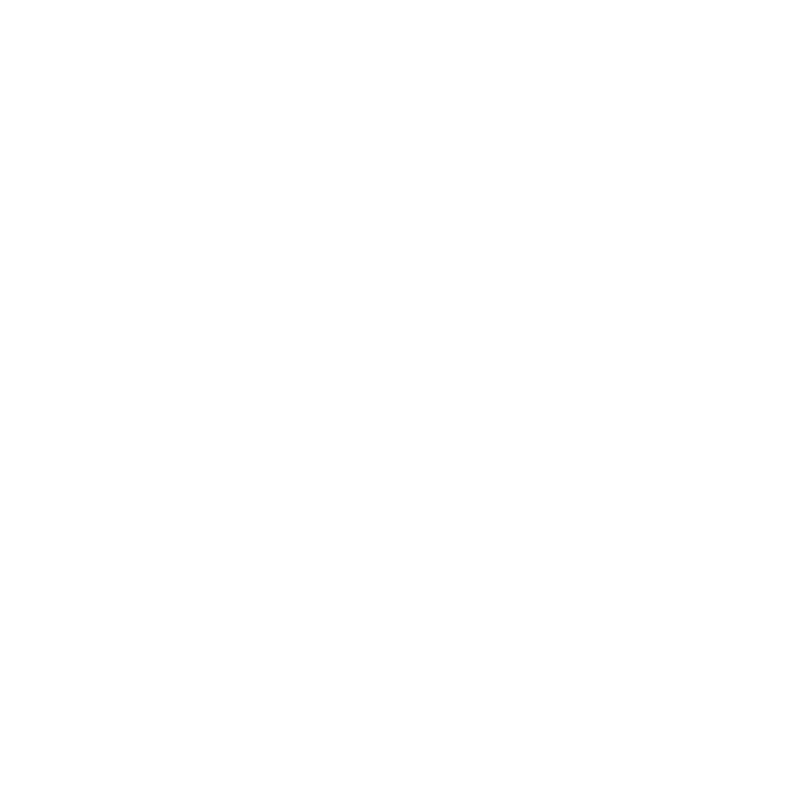

<IPython.core.display.Javascript object>


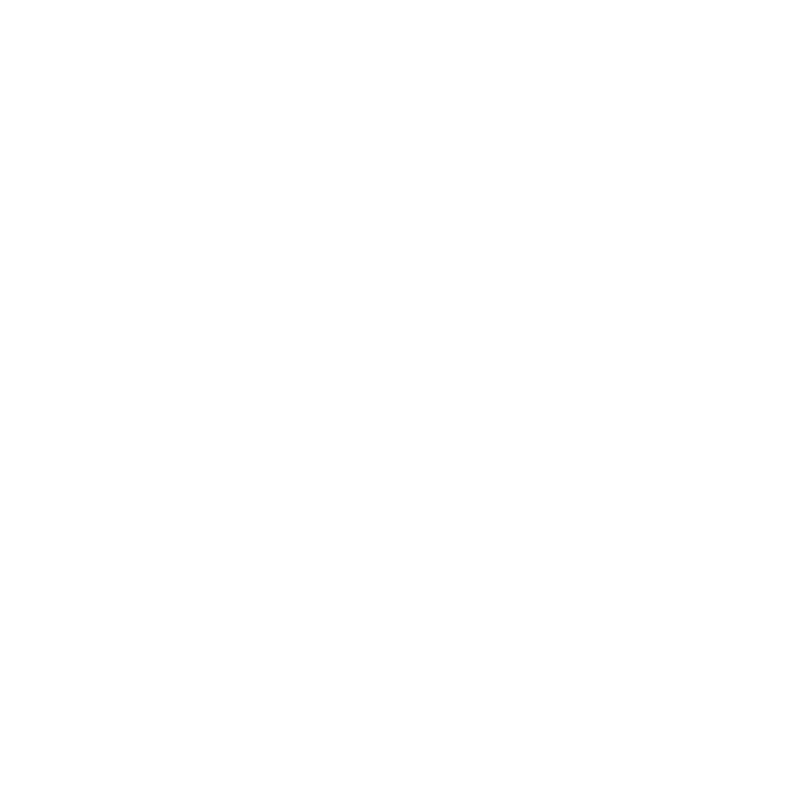

<IPython.core.display.Javascript object>


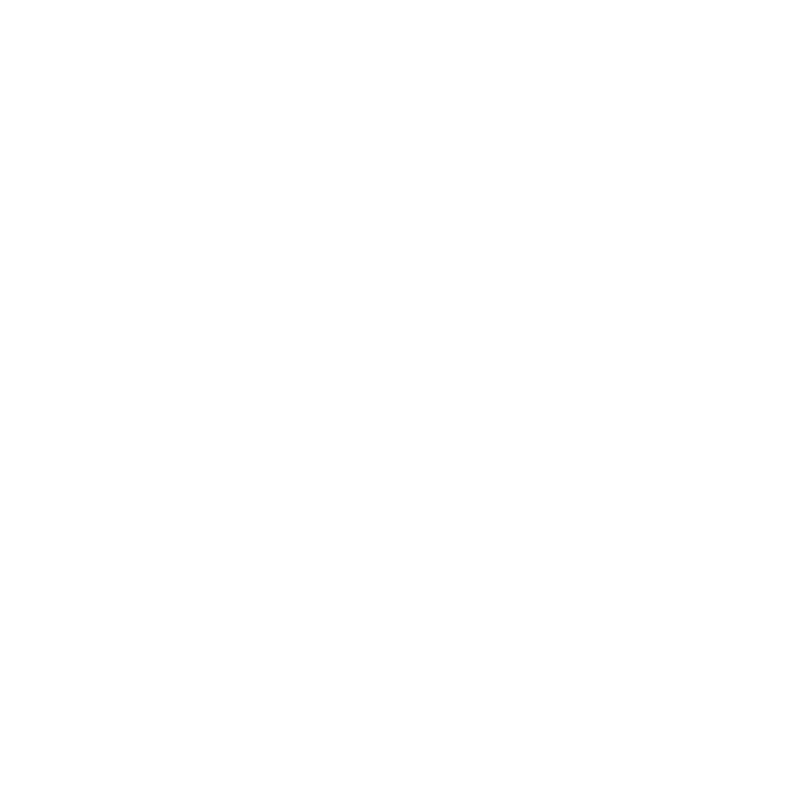

<IPython.core.display.Javascript object>


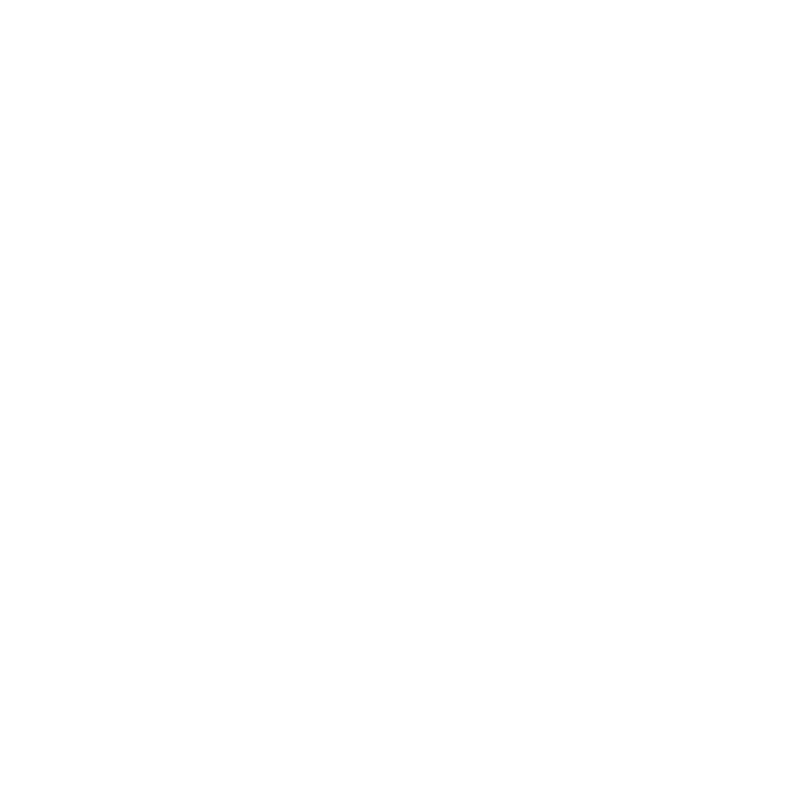

<IPython.core.display.Javascript object>


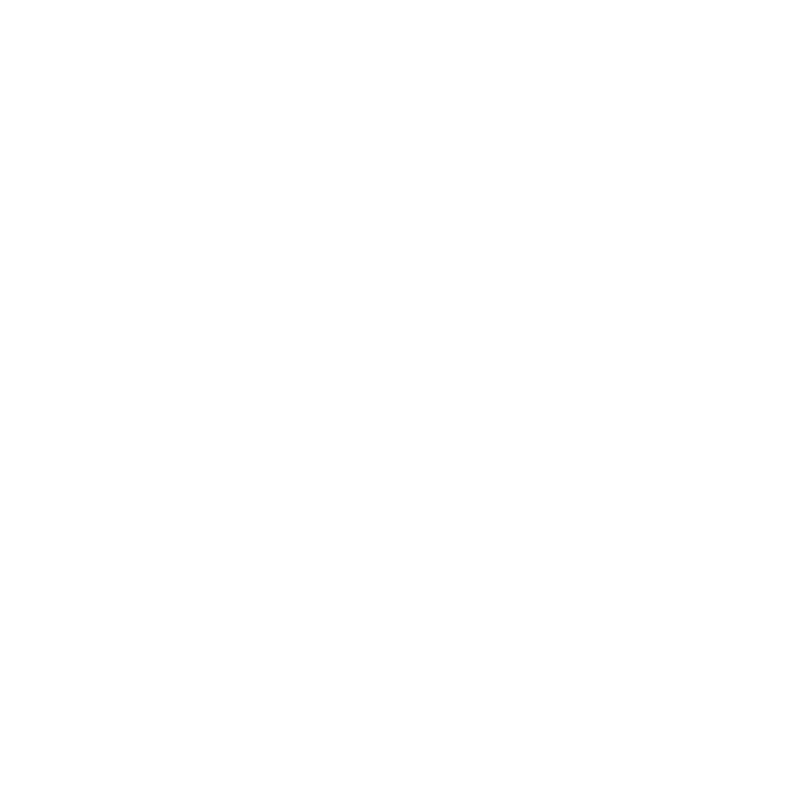

<IPython.core.display.Javascript object>


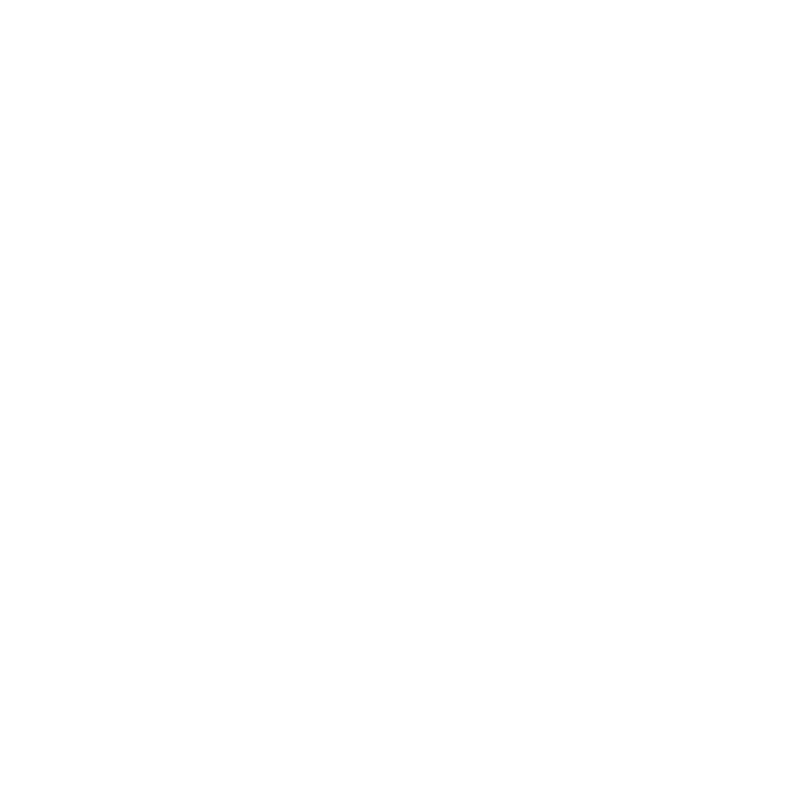

<IPython.core.display.Javascript object>


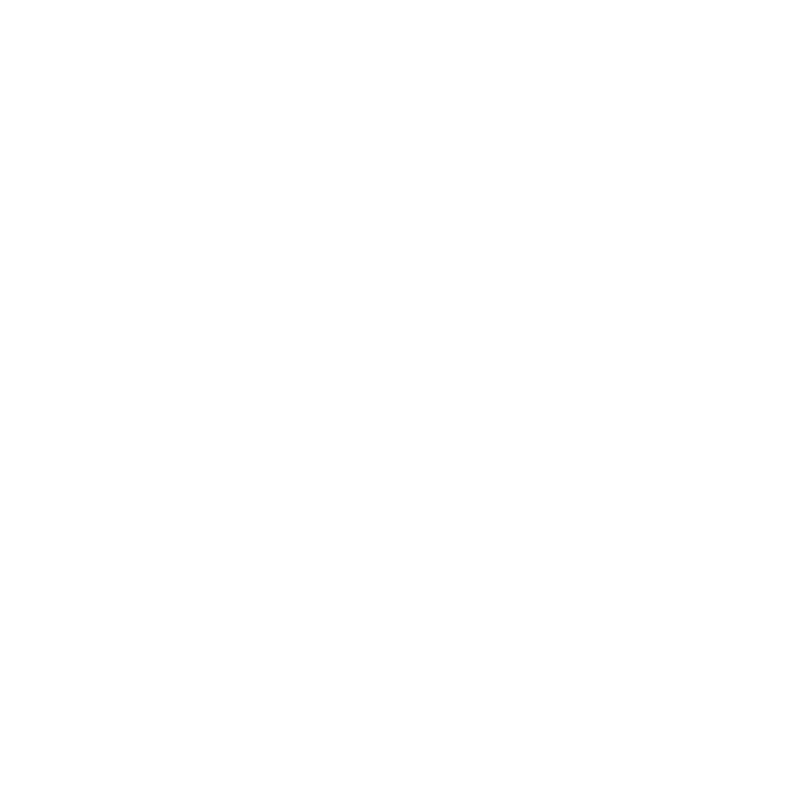

<IPython.core.display.Javascript object>


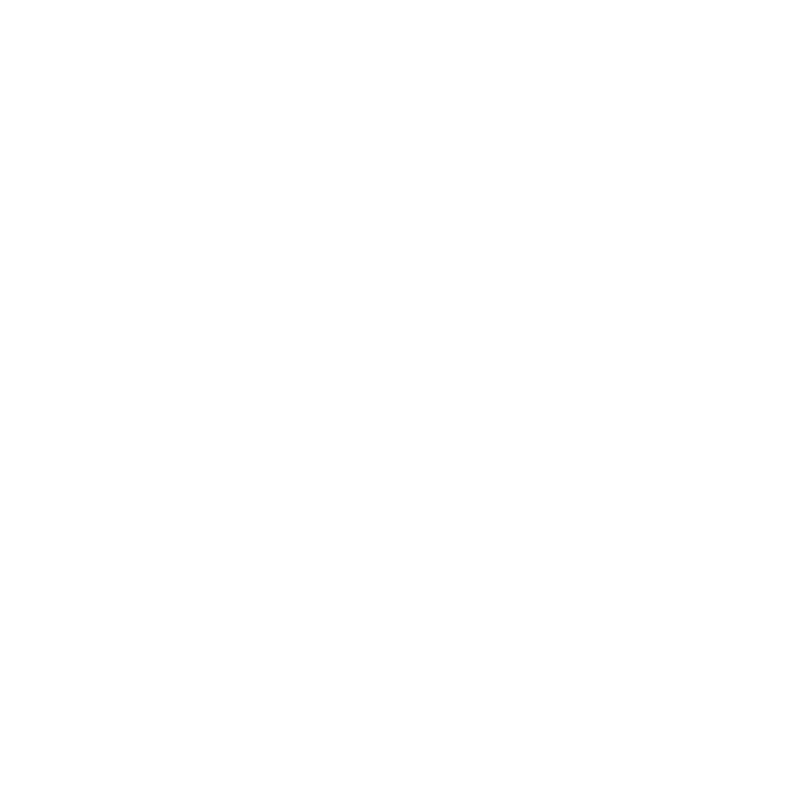

<IPython.core.display.Javascript object>


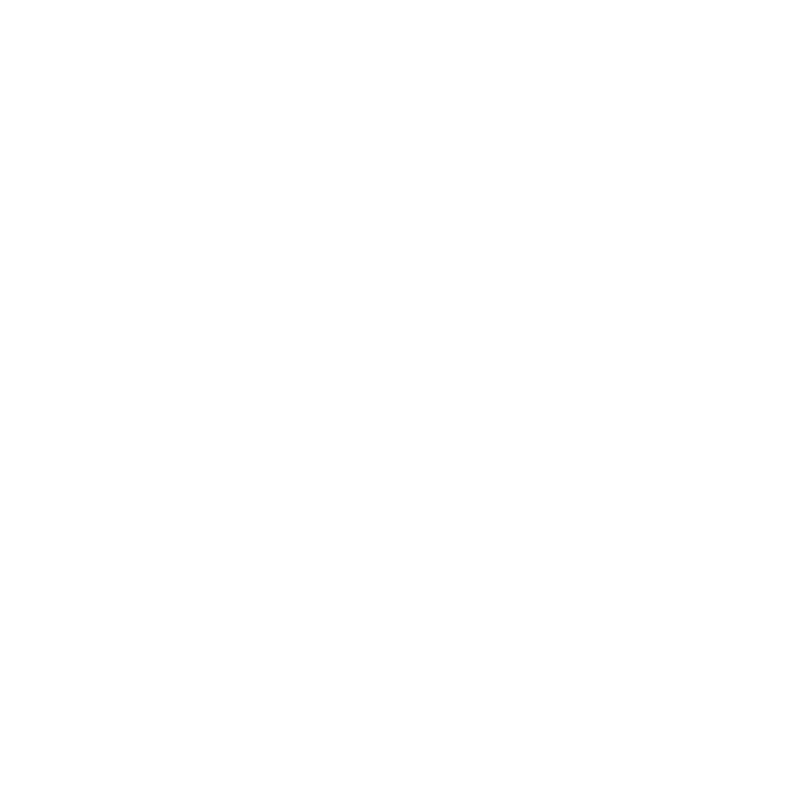

<IPython.core.display.Javascript object>


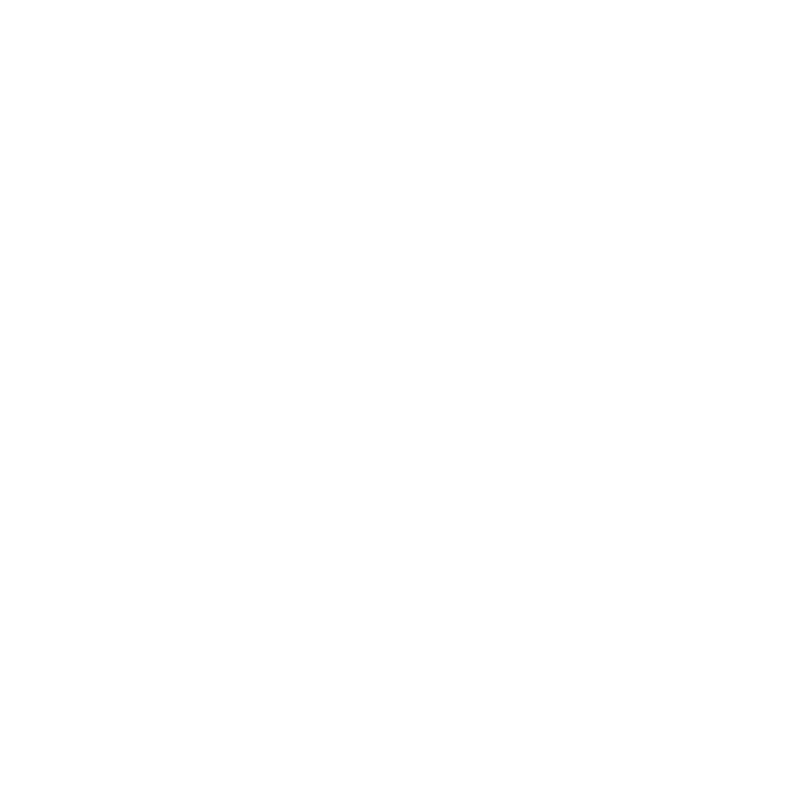

In [116]:
MLlen = len(MasterList)




for i in range(MLlen):
    Void = MasterList[i]
    N = len(Void)

    if(N>1):

        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111, projection='3d')
        colorin = i * np.ones(N)
        ax.scatter(Xv, Yv, Zv, c="green", s=10, alpha=0.5, label="True Void Points")
        ax.scatter(X[Void], Y[Void], Z[Void], cmap=cmap.gist_ncar)
        ax.set_xlim(0,100)
        ax.set_ylim(0,100)
        ax.set_zlim(0,100)
        plt.savefig(FG_path + "recursion1_{}.png".format(i))
        plt.close()
    

In [33]:
MLlen

38

<IPython.core.display.Javascript object>


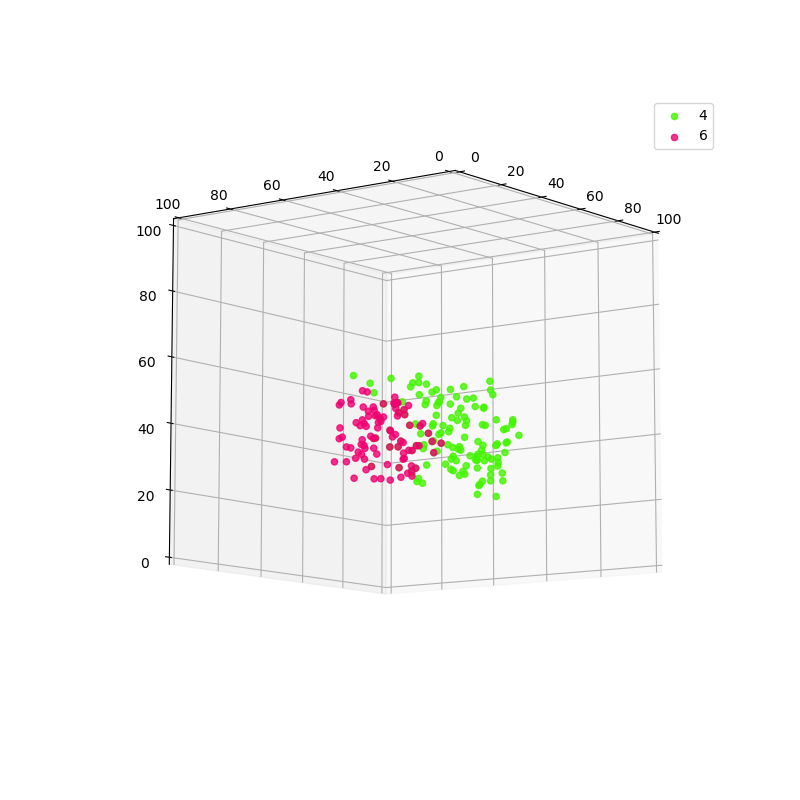

In [113]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

#colormap = plt.cm.gist_ncar
colormap = plt.cm.prism_r

colorst = [colormap(i) for i in np.linspace(0,0.9, MLlen)]


for i in range(MLlen):
    Void = MasterList[i]
    N = len(Void)  
   
    if ((i==4) or (i==6)):
        # p3d = ax.scatter(X[Void], Y[Void], Z[Void], c=colorst[i], alpha=0.8, label=i)
        p3d = ax.scatter(X[Void], Y[Void], Z[Void], c=colorst[i], alpha=0.8, label=i)
        ax.set_xlim(0,100)
        ax.set_ylim(0,100)
        ax.set_zlim(0,100)
        #plt.savefig("{}.png".format(i))
        #plt.close()
        
#for t, j1 in enumerate(ax.collections):
    #j1.set_color(colorst[t])

        
ax.legend()

In [114]:
VOIDS[4]

[65,
 321,
 459,
 496,
 537,
 637,
 756,
 786,
 835,
 839,
 933,
 969,
 1004,
 1015,
 1085,
 1119,
 1134,
 1156,
 1162,
 1175,
 1183,
 1238,
 1275,
 1301,
 1331,
 1387,
 1399,
 1400,
 1426,
 1427,
 1465,
 1499,
 1515,
 1517,
 1534,
 1606,
 1612,
 1634,
 1705,
 1731,
 1738,
 1742,
 1754,
 1777,
 1780,
 1789,
 1866,
 1884,
 1893,
 1895,
 1972,
 1979,
 2010,
 2026,
 2116,
 2185,
 2191,
 2228,
 2240,
 2286,
 2315,
 2319,
 2404,
 2426,
 2443,
 2491,
 2538,
 2594,
 2697,
 2704,
 2712,
 2723,
 2739,
 2747,
 2753,
 2773,
 2794,
 2829,
 2878,
 2940,
 2946,
 2987,
 3065,
 3089,
 3097,
 3212,
 3218,
 3219,
 3257,
 3275,
 3296,
 3303,
 3385,
 3388,
 3390,
 3397,
 3424,
 3427,
 3457,
 3463,
 3464,
 3478,
 3512,
 3537,
 3554,
 3573,
 3581,
 3587,
 3602,
 3634,
 3641,
 3654,
 3680,
 3711,
 3731,
 3750,
 3813,
 3824,
 3825,
 3832,
 3841,
 3853,
 3888,
 3898,
 3906,
 3916,
 3948,
 3964,
 3983,
 3990,
 4040,
 4041,
 4055,
 4098,
 4128,
 4130,
 4158,
 4165,
 4177,
 4181]

In [115]:
VOIDS[6]

[78,
 155,
 165,
 166,
 203,
 221,
 226,
 231,
 243,
 370,
 371,
 380,
 382,
 477,
 521,
 547,
 568,
 583,
 610,
 758,
 789,
 806,
 856,
 885,
 917,
 922,
 924,
 951,
 969,
 975,
 1004,
 1050,
 1153,
 1239,
 1314,
 1411,
 1427,
 1450,
 1465,
 1510,
 1789,
 1793,
 1884,
 1893,
 1895,
 1900,
 1932,
 2054,
 2119,
 2315,
 2404,
 2463,
 2552,
 2594,
 2628,
 2641,
 2660,
 2668,
 2687,
 2739,
 2773,
 2783,
 2794,
 2827,
 2860,
 2946,
 2969,
 2971,
 3040,
 3065,
 3084,
 3108,
 3145,
 3187,
 3212,
 3218,
 3242,
 3296,
 3397,
 3537,
 3586,
 3602,
 3605,
 3822,
 3853,
 3893,
 3898,
 3916,
 4038,
 4040,
 4133]

https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib/39168267#39168267